In [1]:
import os

HOME = os.getcwd()
print(HOME)

/kaggle/working


## Installing YOLOv8
YOLO is a family of object detection algorithms in computer vision that are used for real-time object detection and recognition. The primary advantage of YOLO is its ability to detect and classify objects in an image in a single forward pass through the neural network, making it very fast and efficient.

In [2]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5310.5/8062.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Dataset Loading

In [4]:
# Set up directory paths
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Install Roboflow package
!pip install roboflow --quiet

from roboflow import Roboflow
#from APIKey import api_key # That is a private key, so I stored it on a python script

# Initialize Roboflow with API key
rf = Roboflow(api_key='Sn1vSUk86V5QpQ25WfdA')


# Define Roboflow workspace, project, and version
project = rf.workspace("bassem-ahmed-ouwsa").project("dentistry-vbril")
dataset = project.version(2).download("yolov8")


/kaggle/working/datasets
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab 4.0.5 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.0.1 requires jupyterlab<5.0.0a0,>=4.0.6, but you have jupyterlab 4.0.5 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pytoolconfig 1.2.6 requires packaging>=22.0, but you have packaging 21.3 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflowjs 4.14.0 

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dentistry-2 in yolov8:: 100%|██████████| 1139/1139 [00:00<00:00, 9900.20it/s] 


## Model Training
We are using YOLOv8x architicture.

In [5]:
%cd {HOME}

# Define YOLO training parameters and execute it
!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=105 imgsz=544 dropout=0.2 optimizer=SGD patience=50

/kaggle/working
100%|█████████████████████████████████████████| 137M/137M [00:00<00:00, 257MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/kaggle/working/datasets/Dentistry-2/data.yaml, epochs=105, patience=50, batch=16, imgsz=544, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes

#### List files in the specified directory


In [6]:
!ls {HOME}/runs/segment/train/

BoxF1_curve.png					  train_batch0.jpg
BoxPR_curve.png					  train_batch1.jpg
BoxP_curve.png					  train_batch2.jpg
BoxR_curve.png					  train_batch2755.jpg
MaskF1_curve.png				  train_batch2756.jpg
MaskPR_curve.png				  train_batch2757.jpg
MaskP_curve.png					  val_batch0_labels.jpg
MaskR_curve.png					  val_batch0_pred.jpg
args.yaml					  val_batch1_labels.jpg
confusion_matrix.png				  val_batch1_pred.jpg
events.out.tfevents.1703702373.0376bfc75b67.88.0  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights


## Model Evaluation
### Confusion Matrix

/kaggle/working


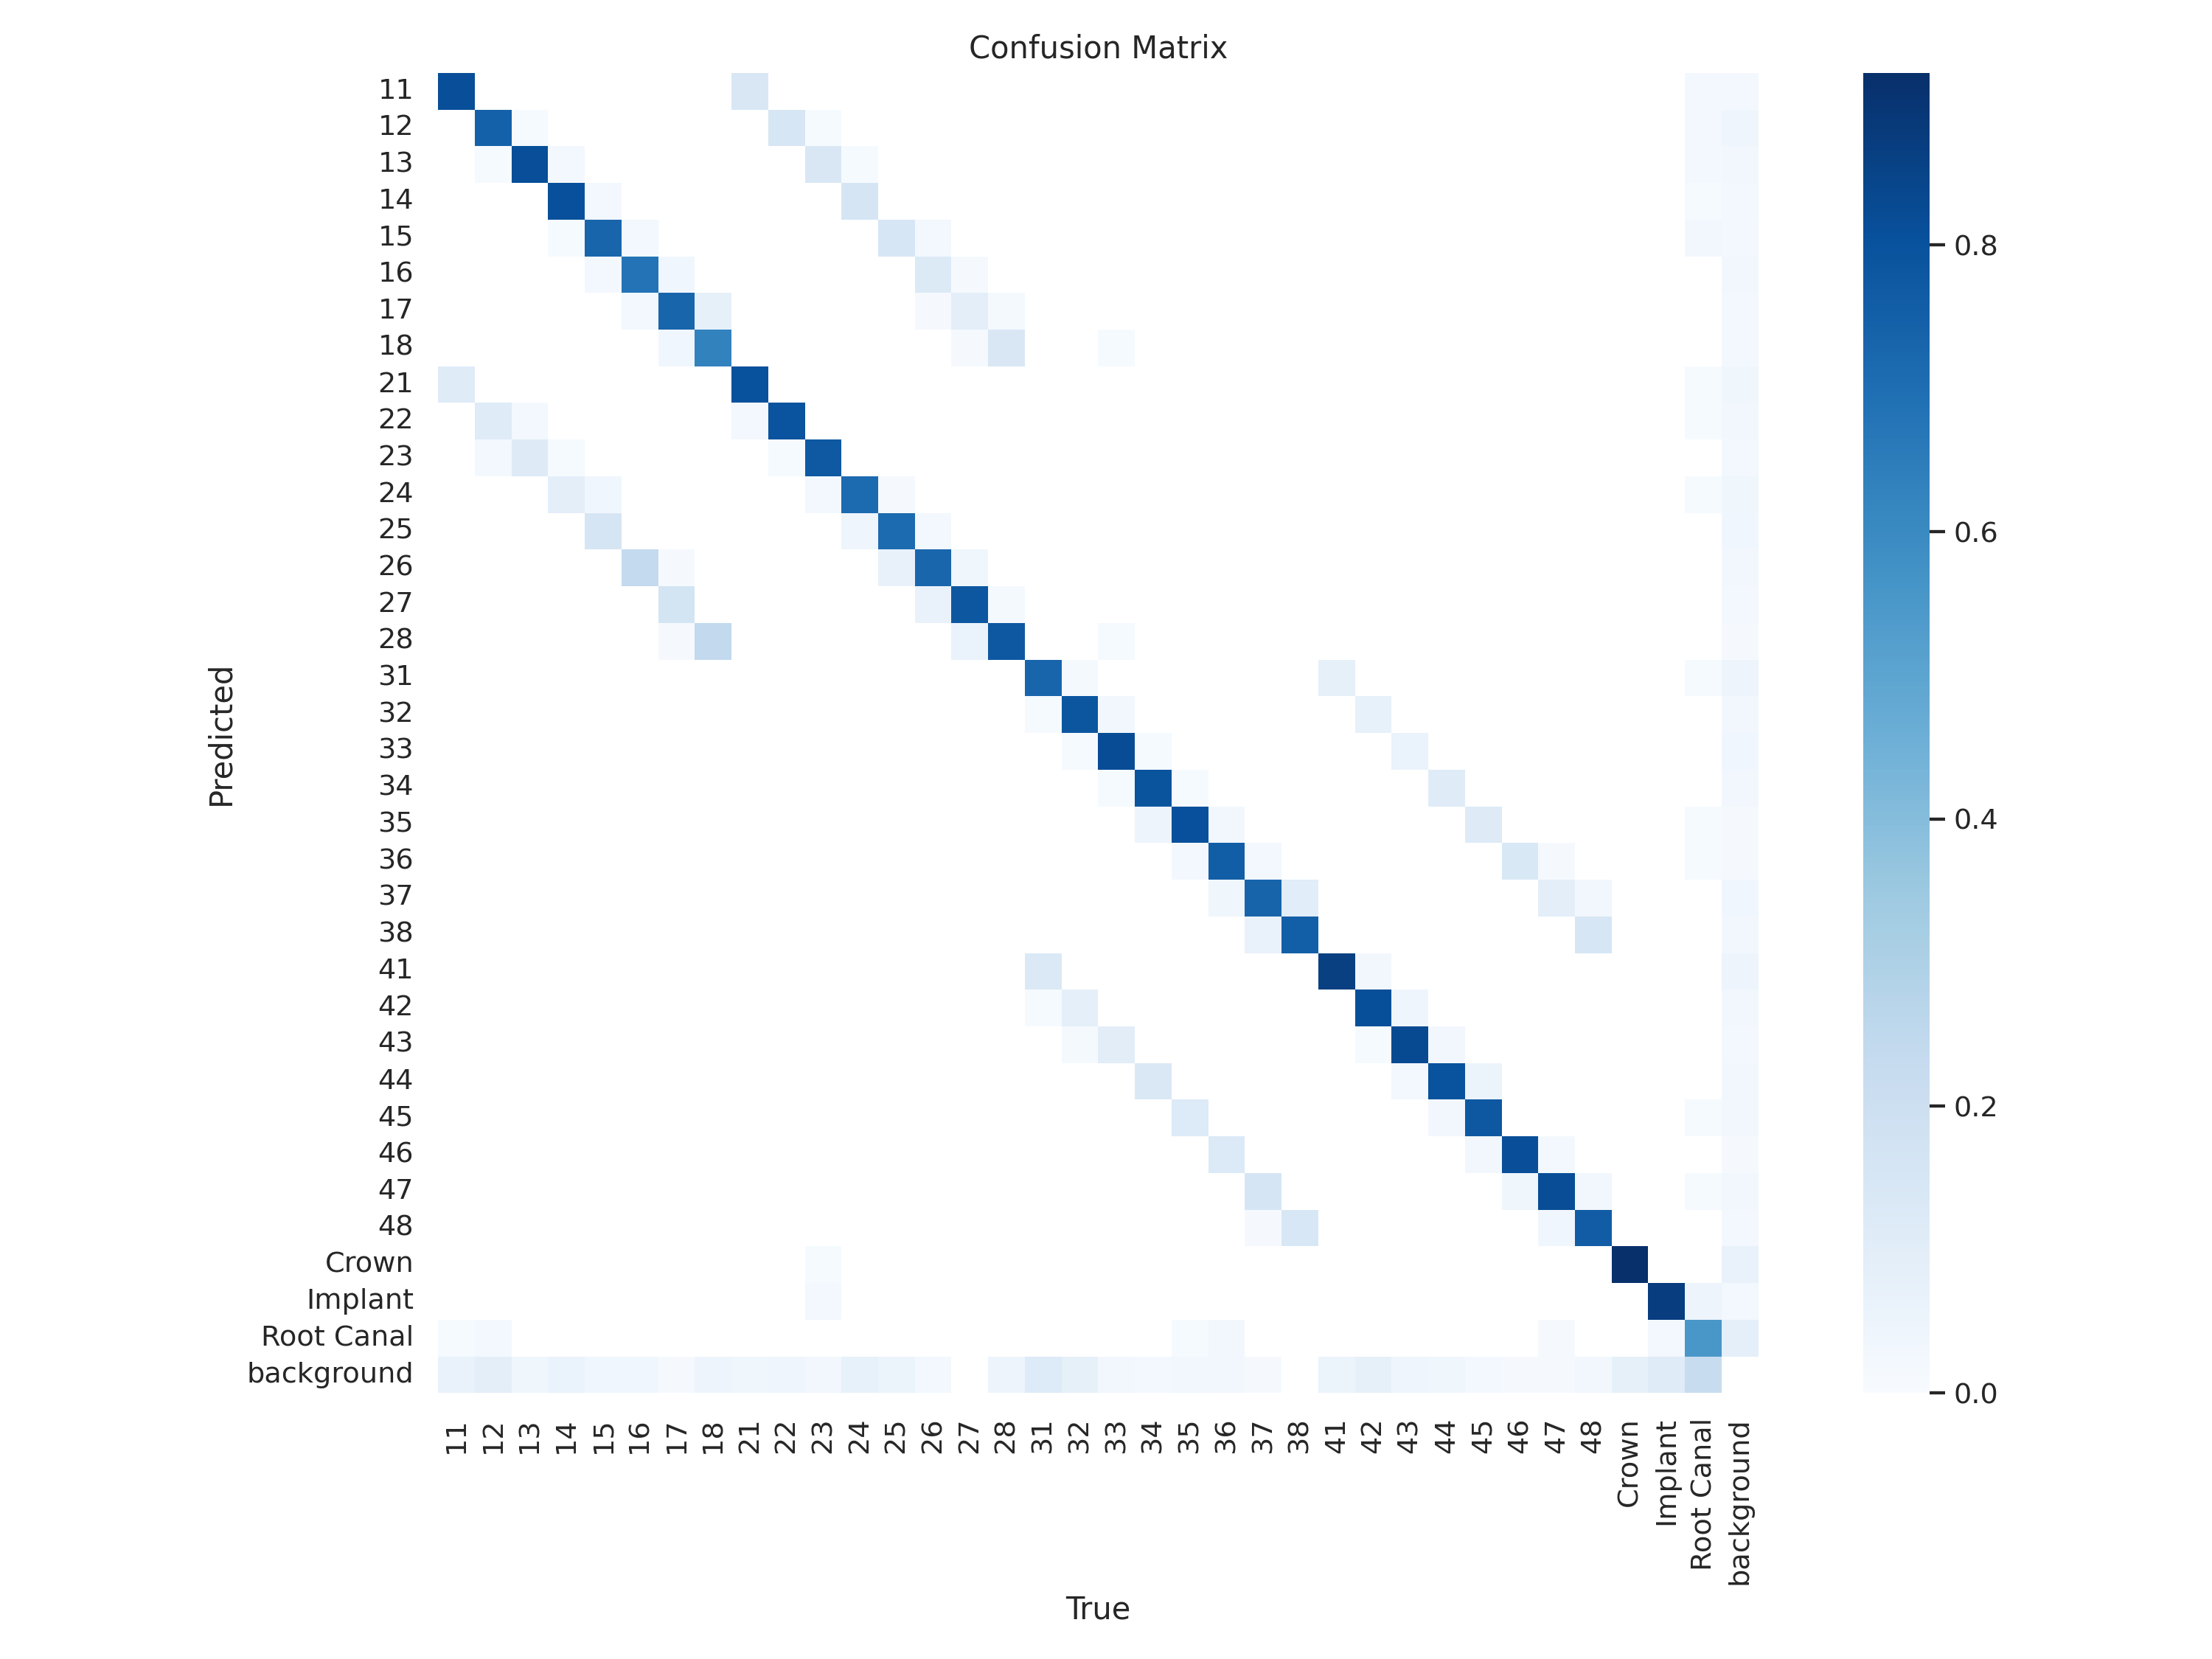

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=800)

### Metrics
- The box loss, often referred to as localization loss or regression loss, measures how well the model predicts the bounding box coordinates (x, y, width, height) for each object in the image.
- The segmentation loss measures the difference between the predicted segmentation mask and the ground truth mask for each object.
- The classification loss, often simply called the class loss, measures how well the model classifies the objects within the predicted bounding boxes
- mAP50 (mean Average Precision at 50 IoU threshold) is a metric that combines precision and recall to assess the performance of a classification or object detection algorithm.

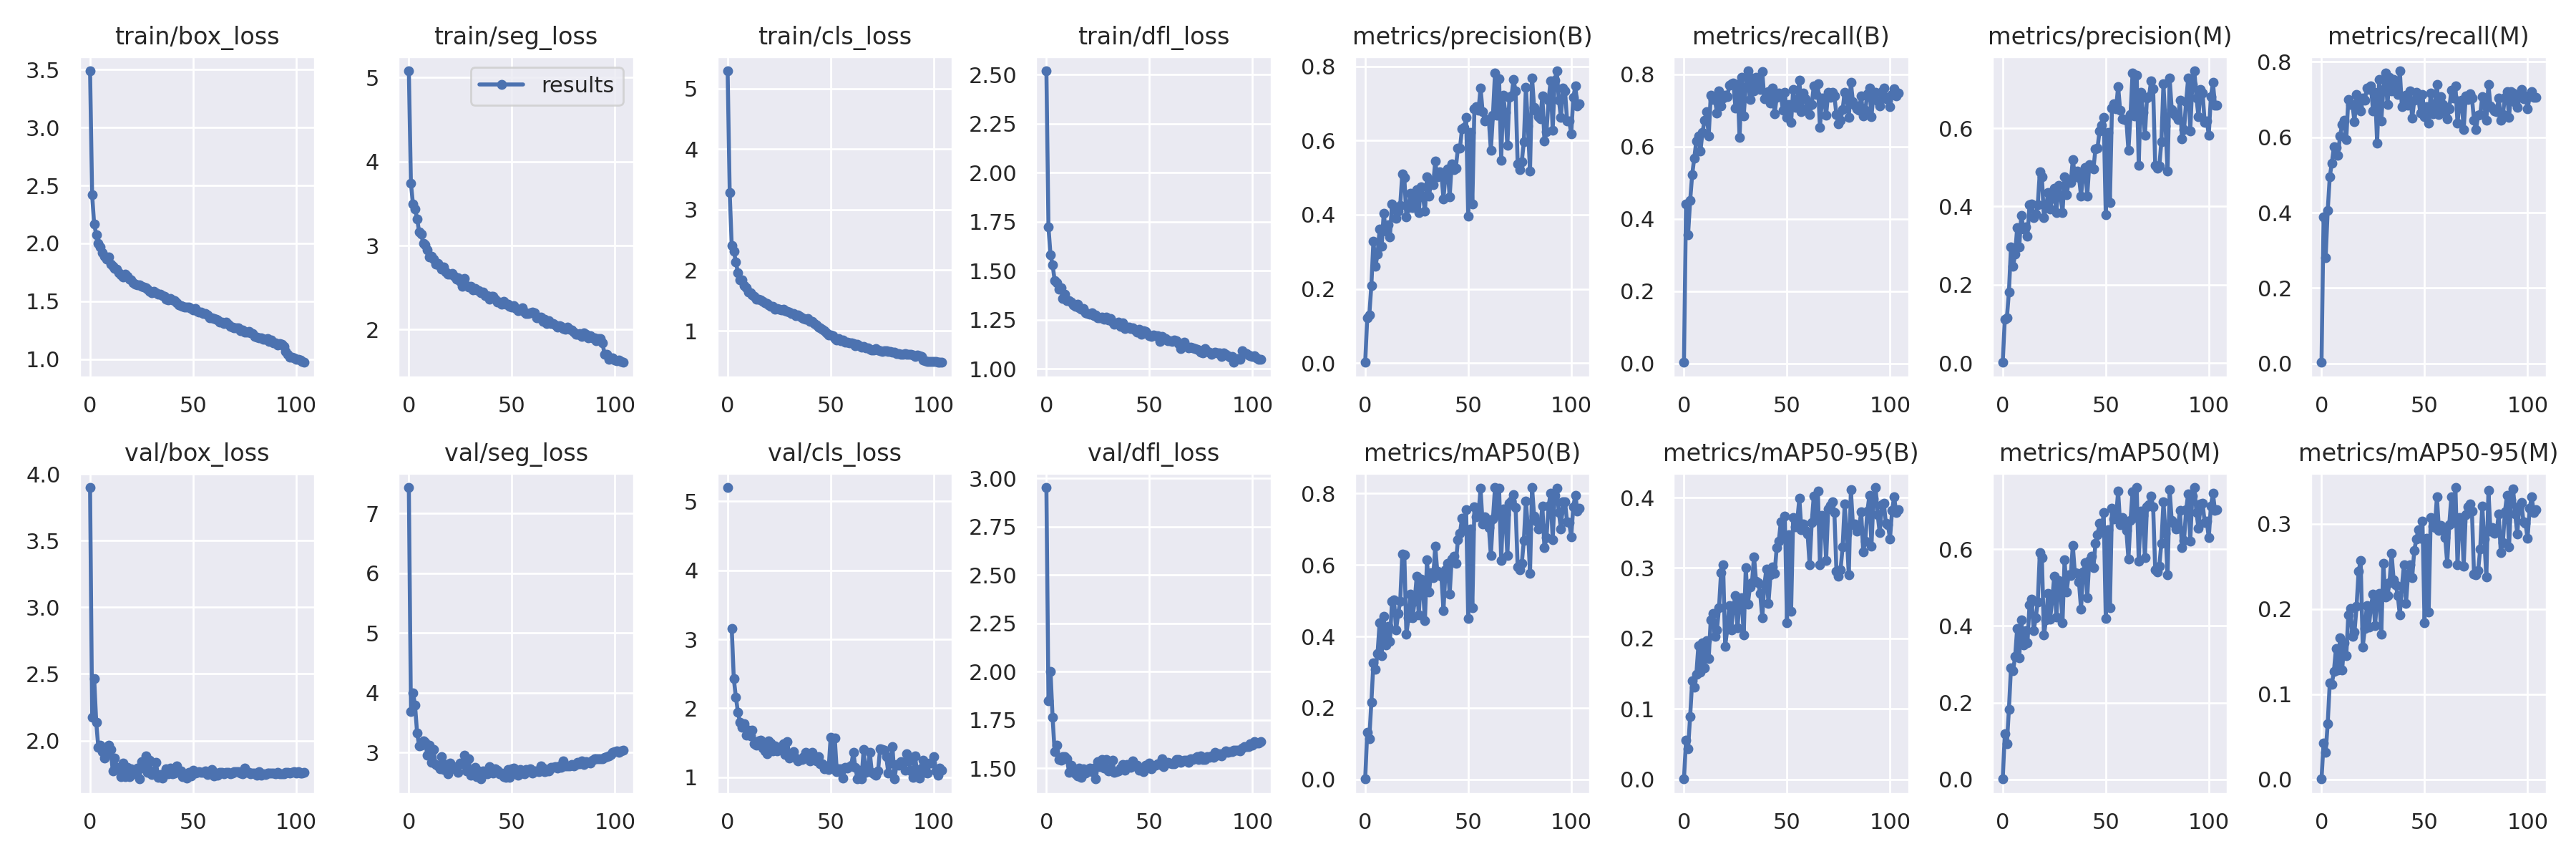

In [8]:
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1400)

### Other Metrics

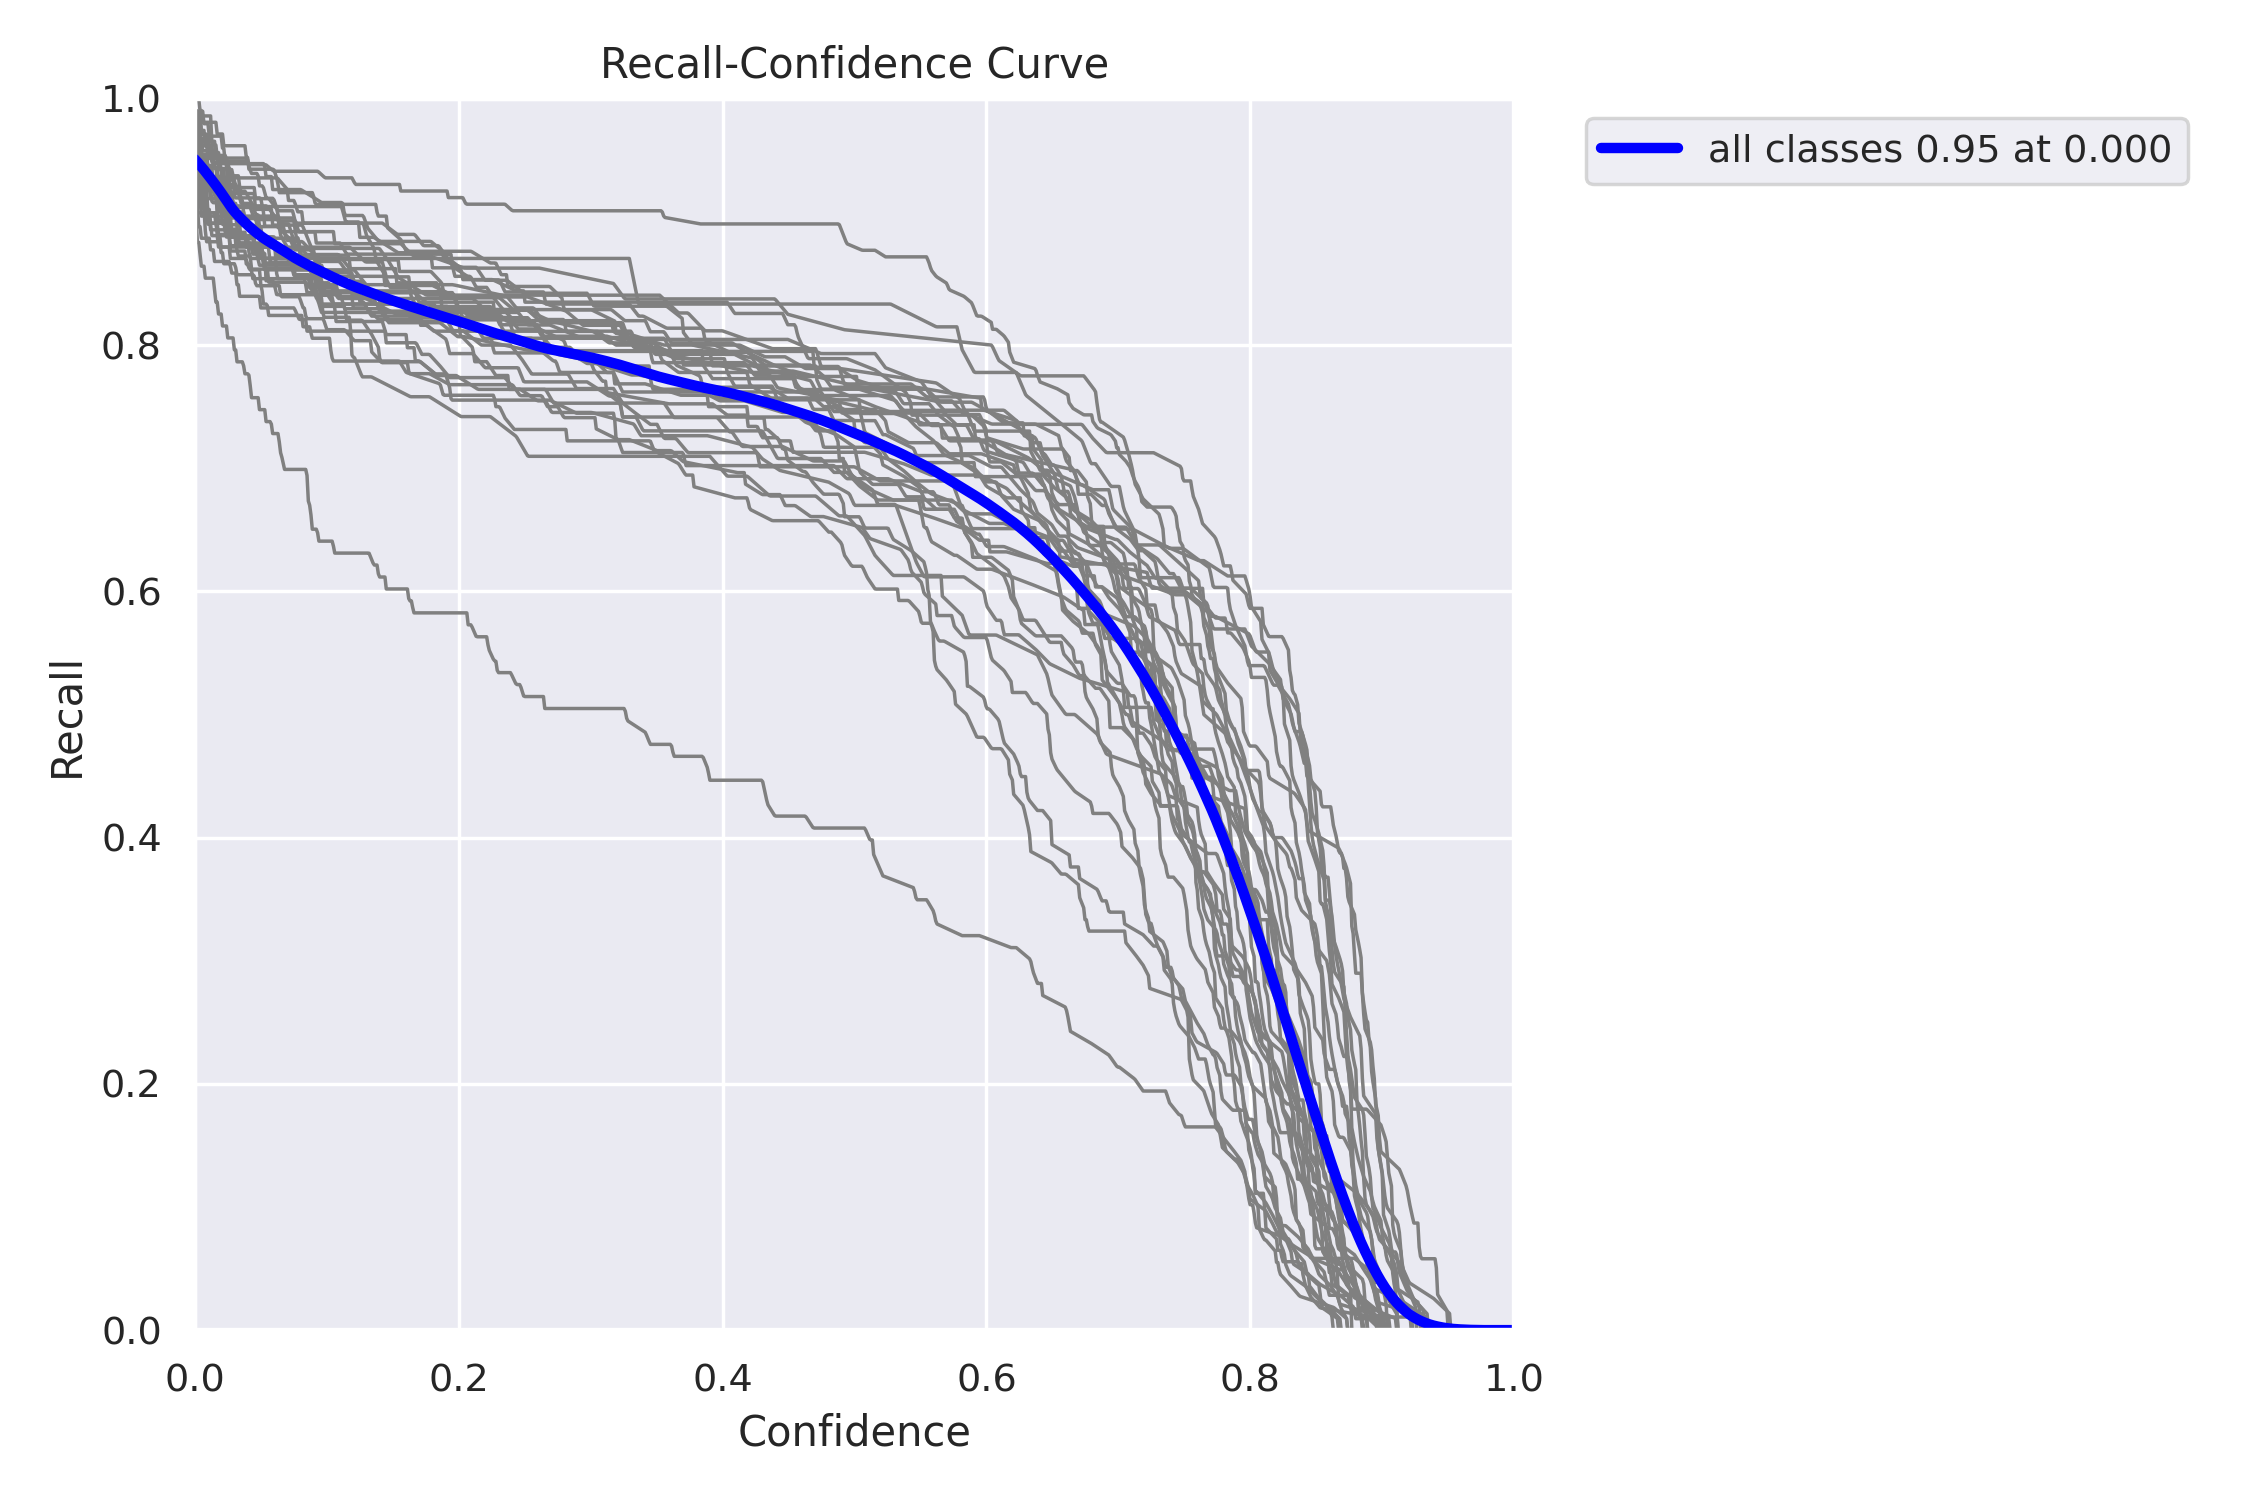

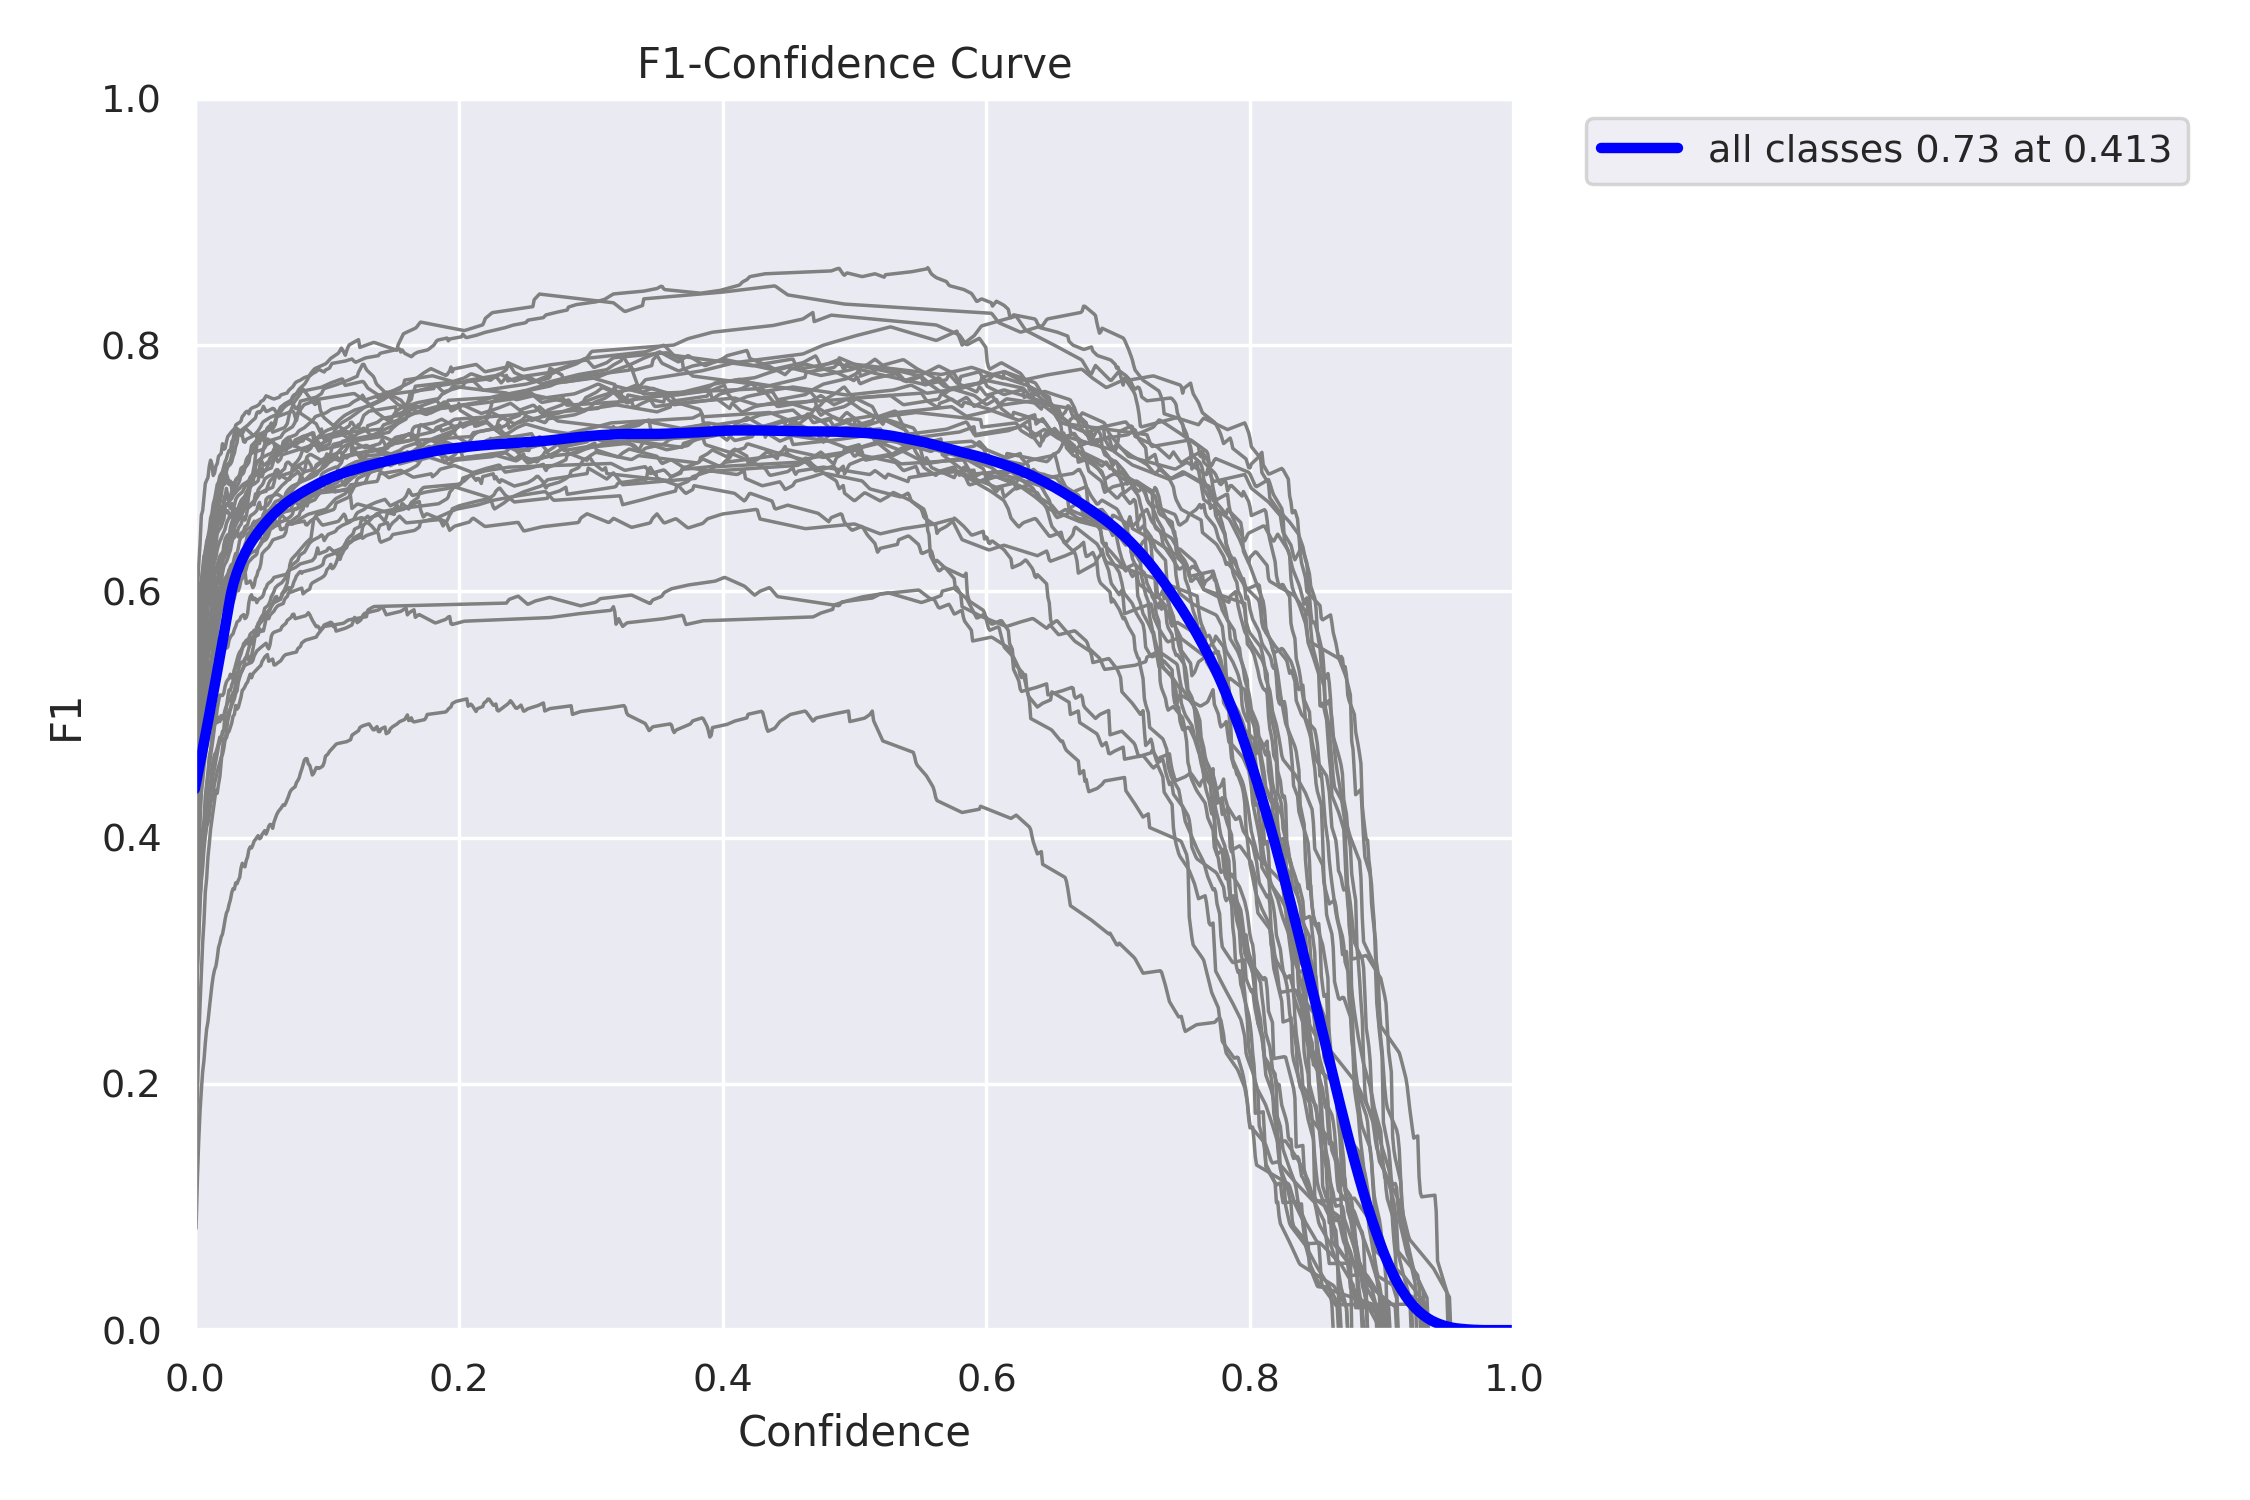

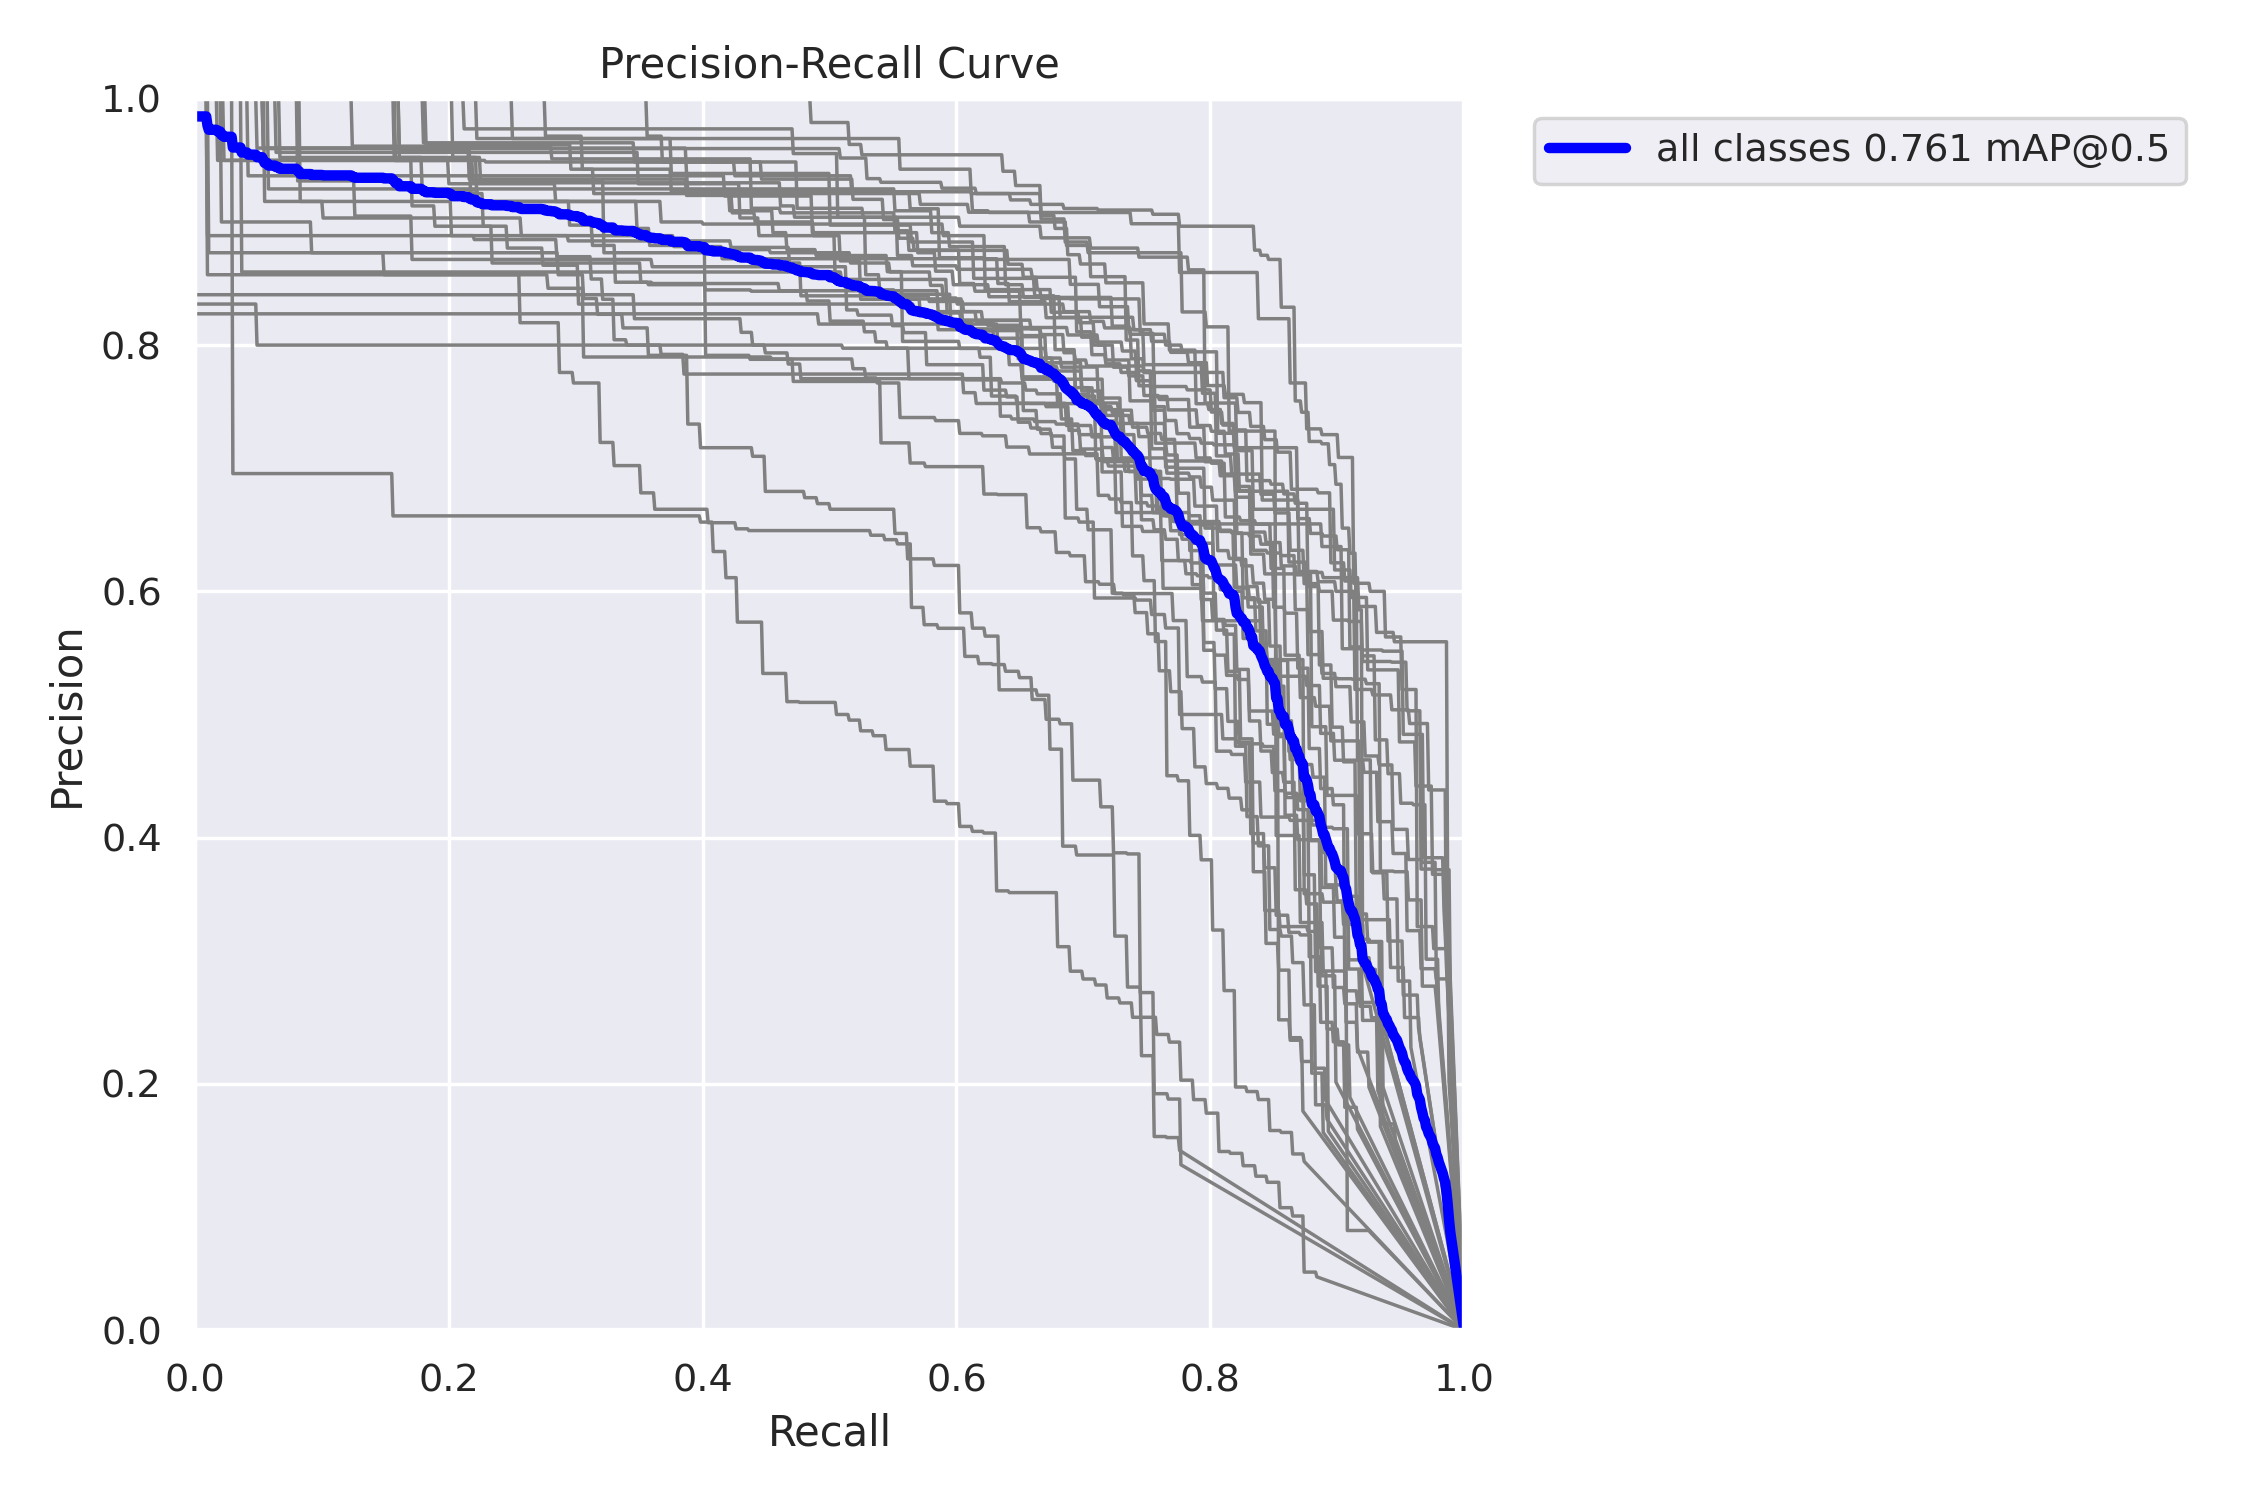

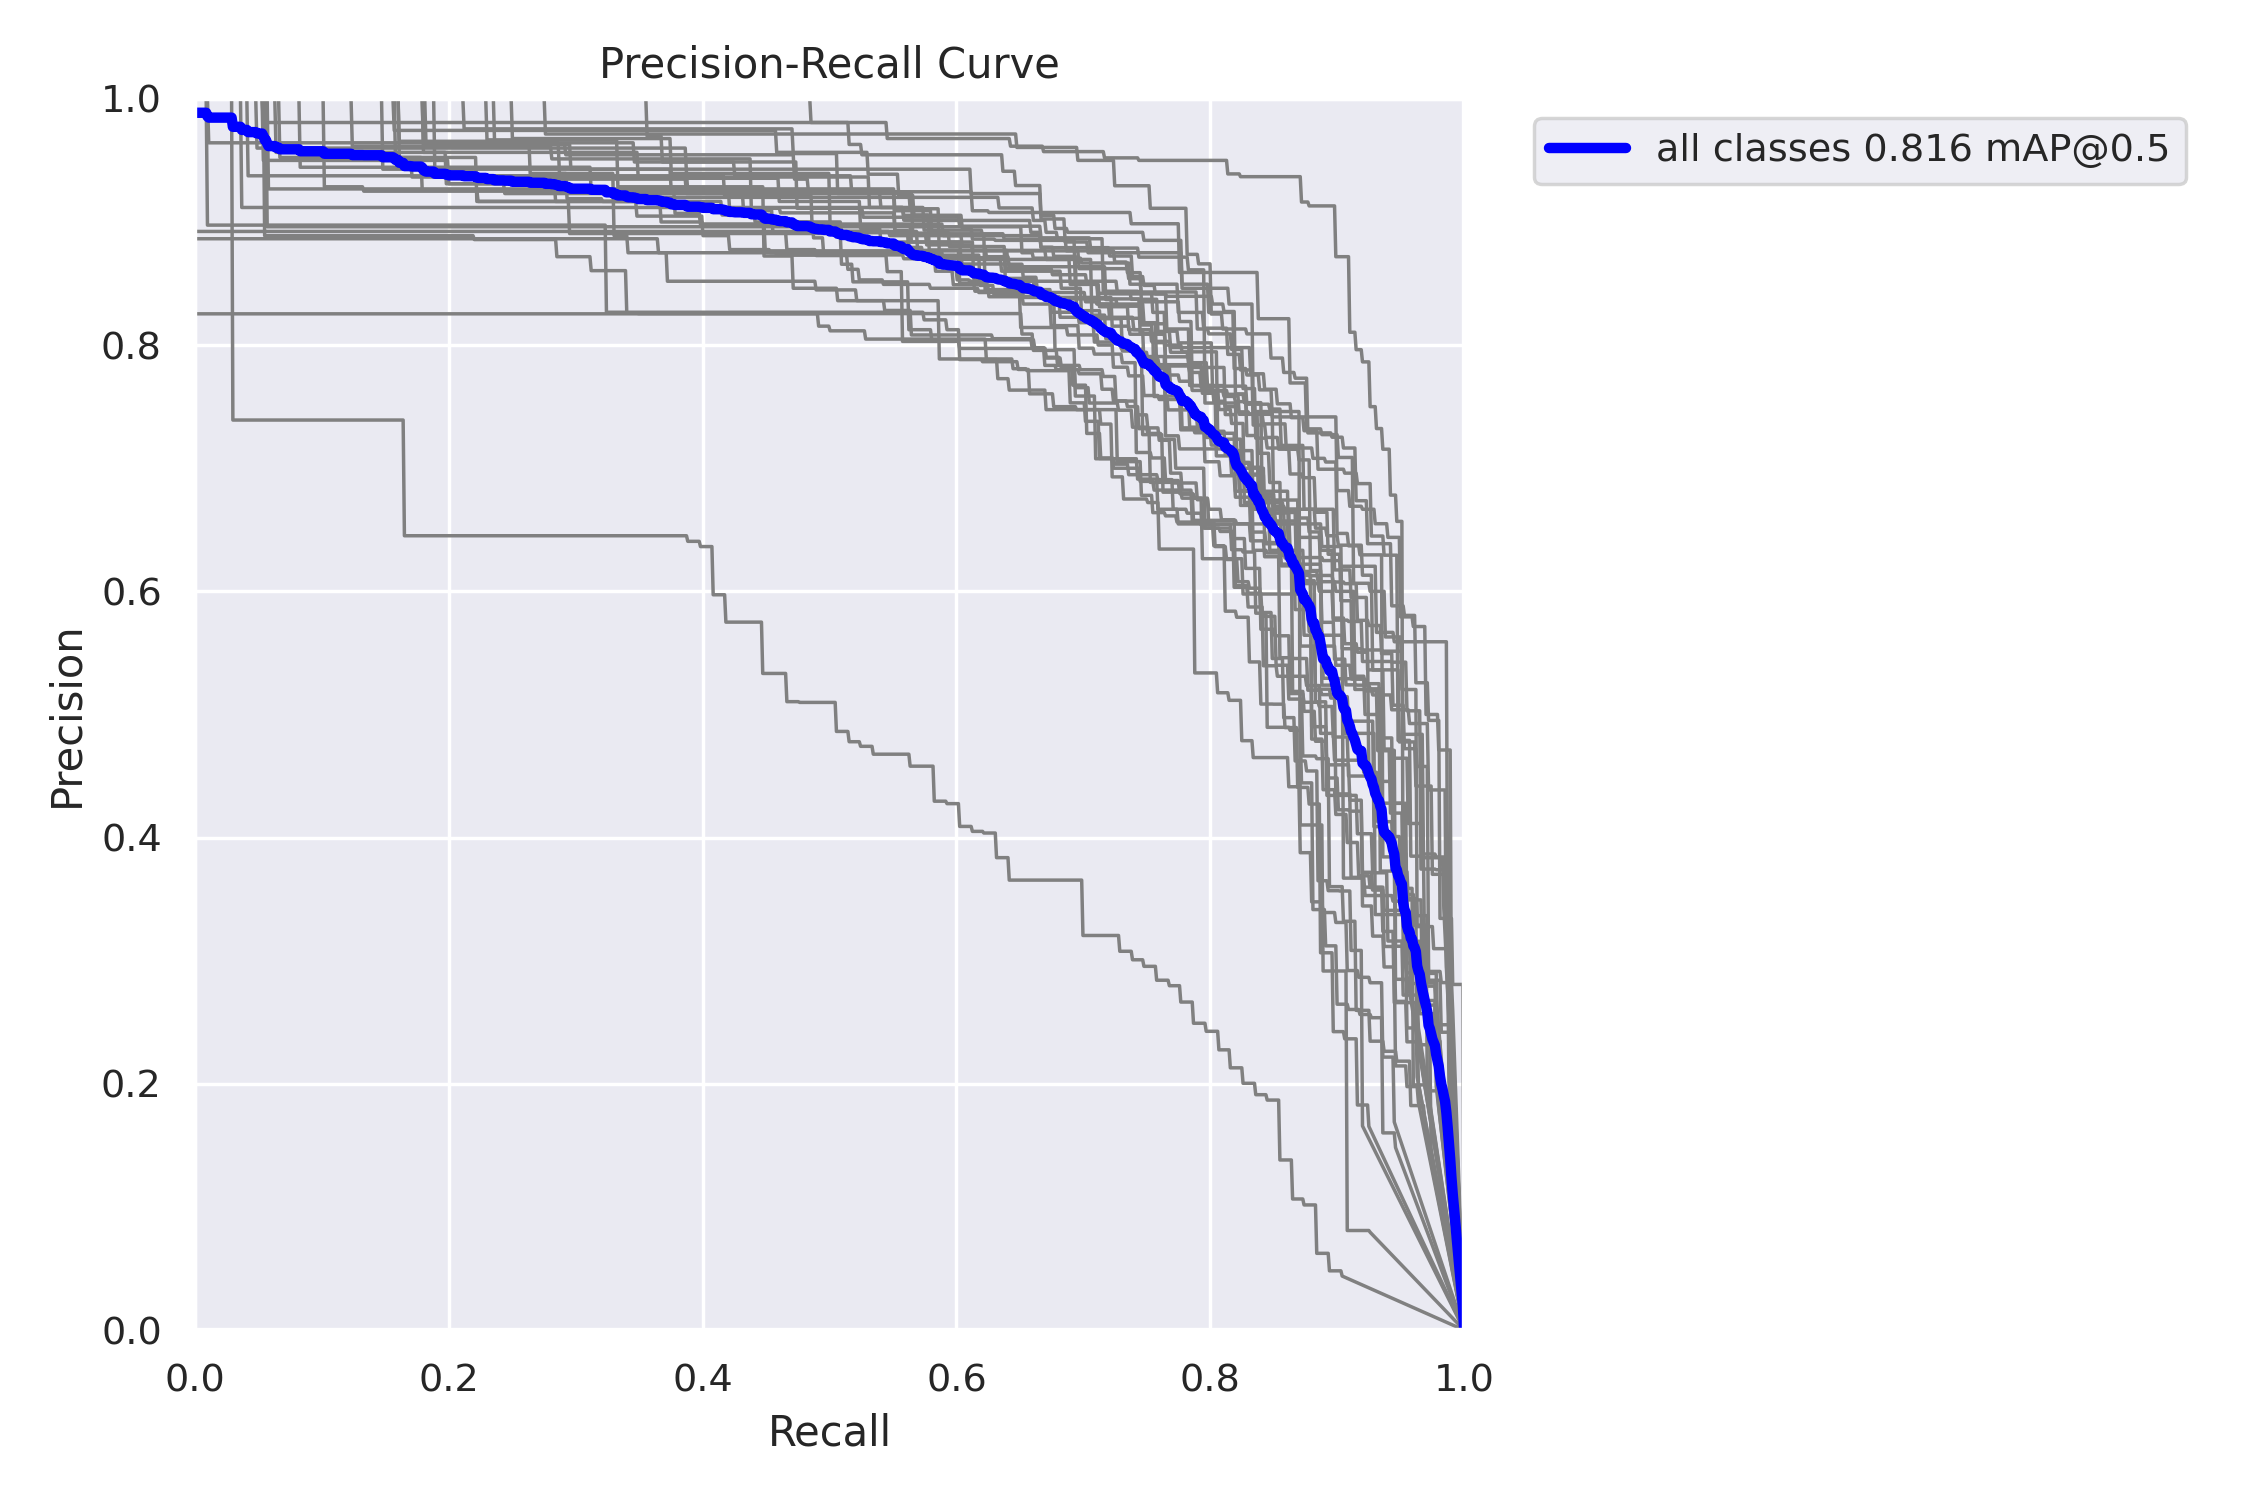

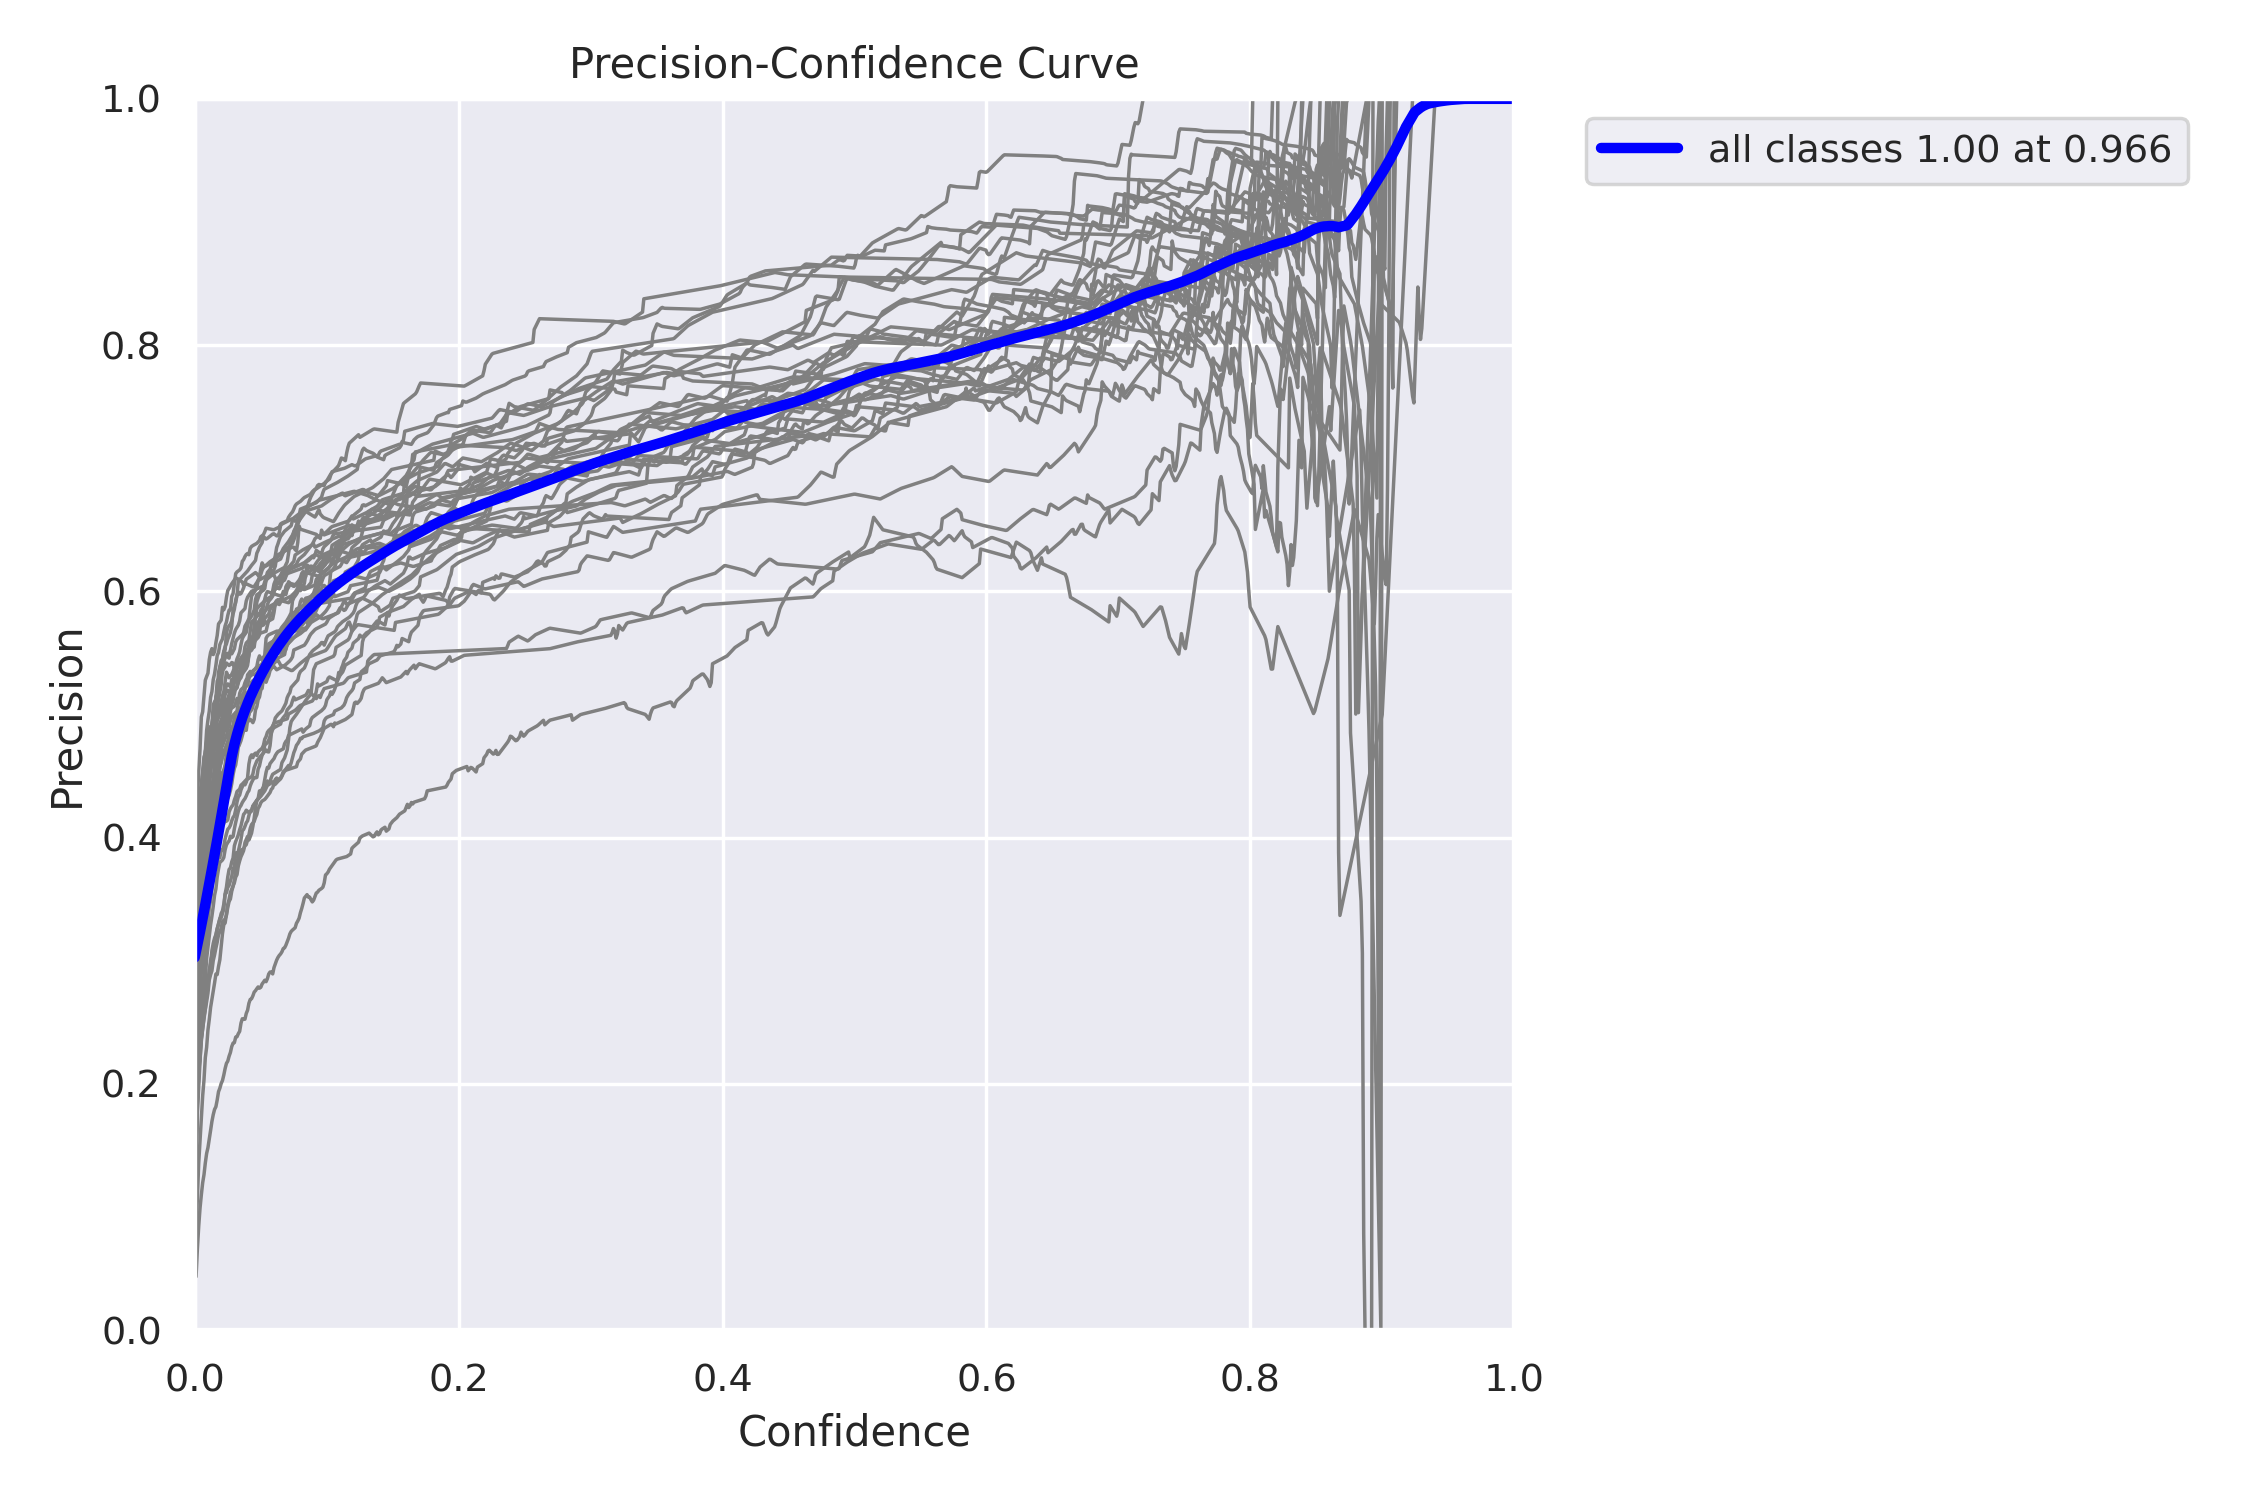

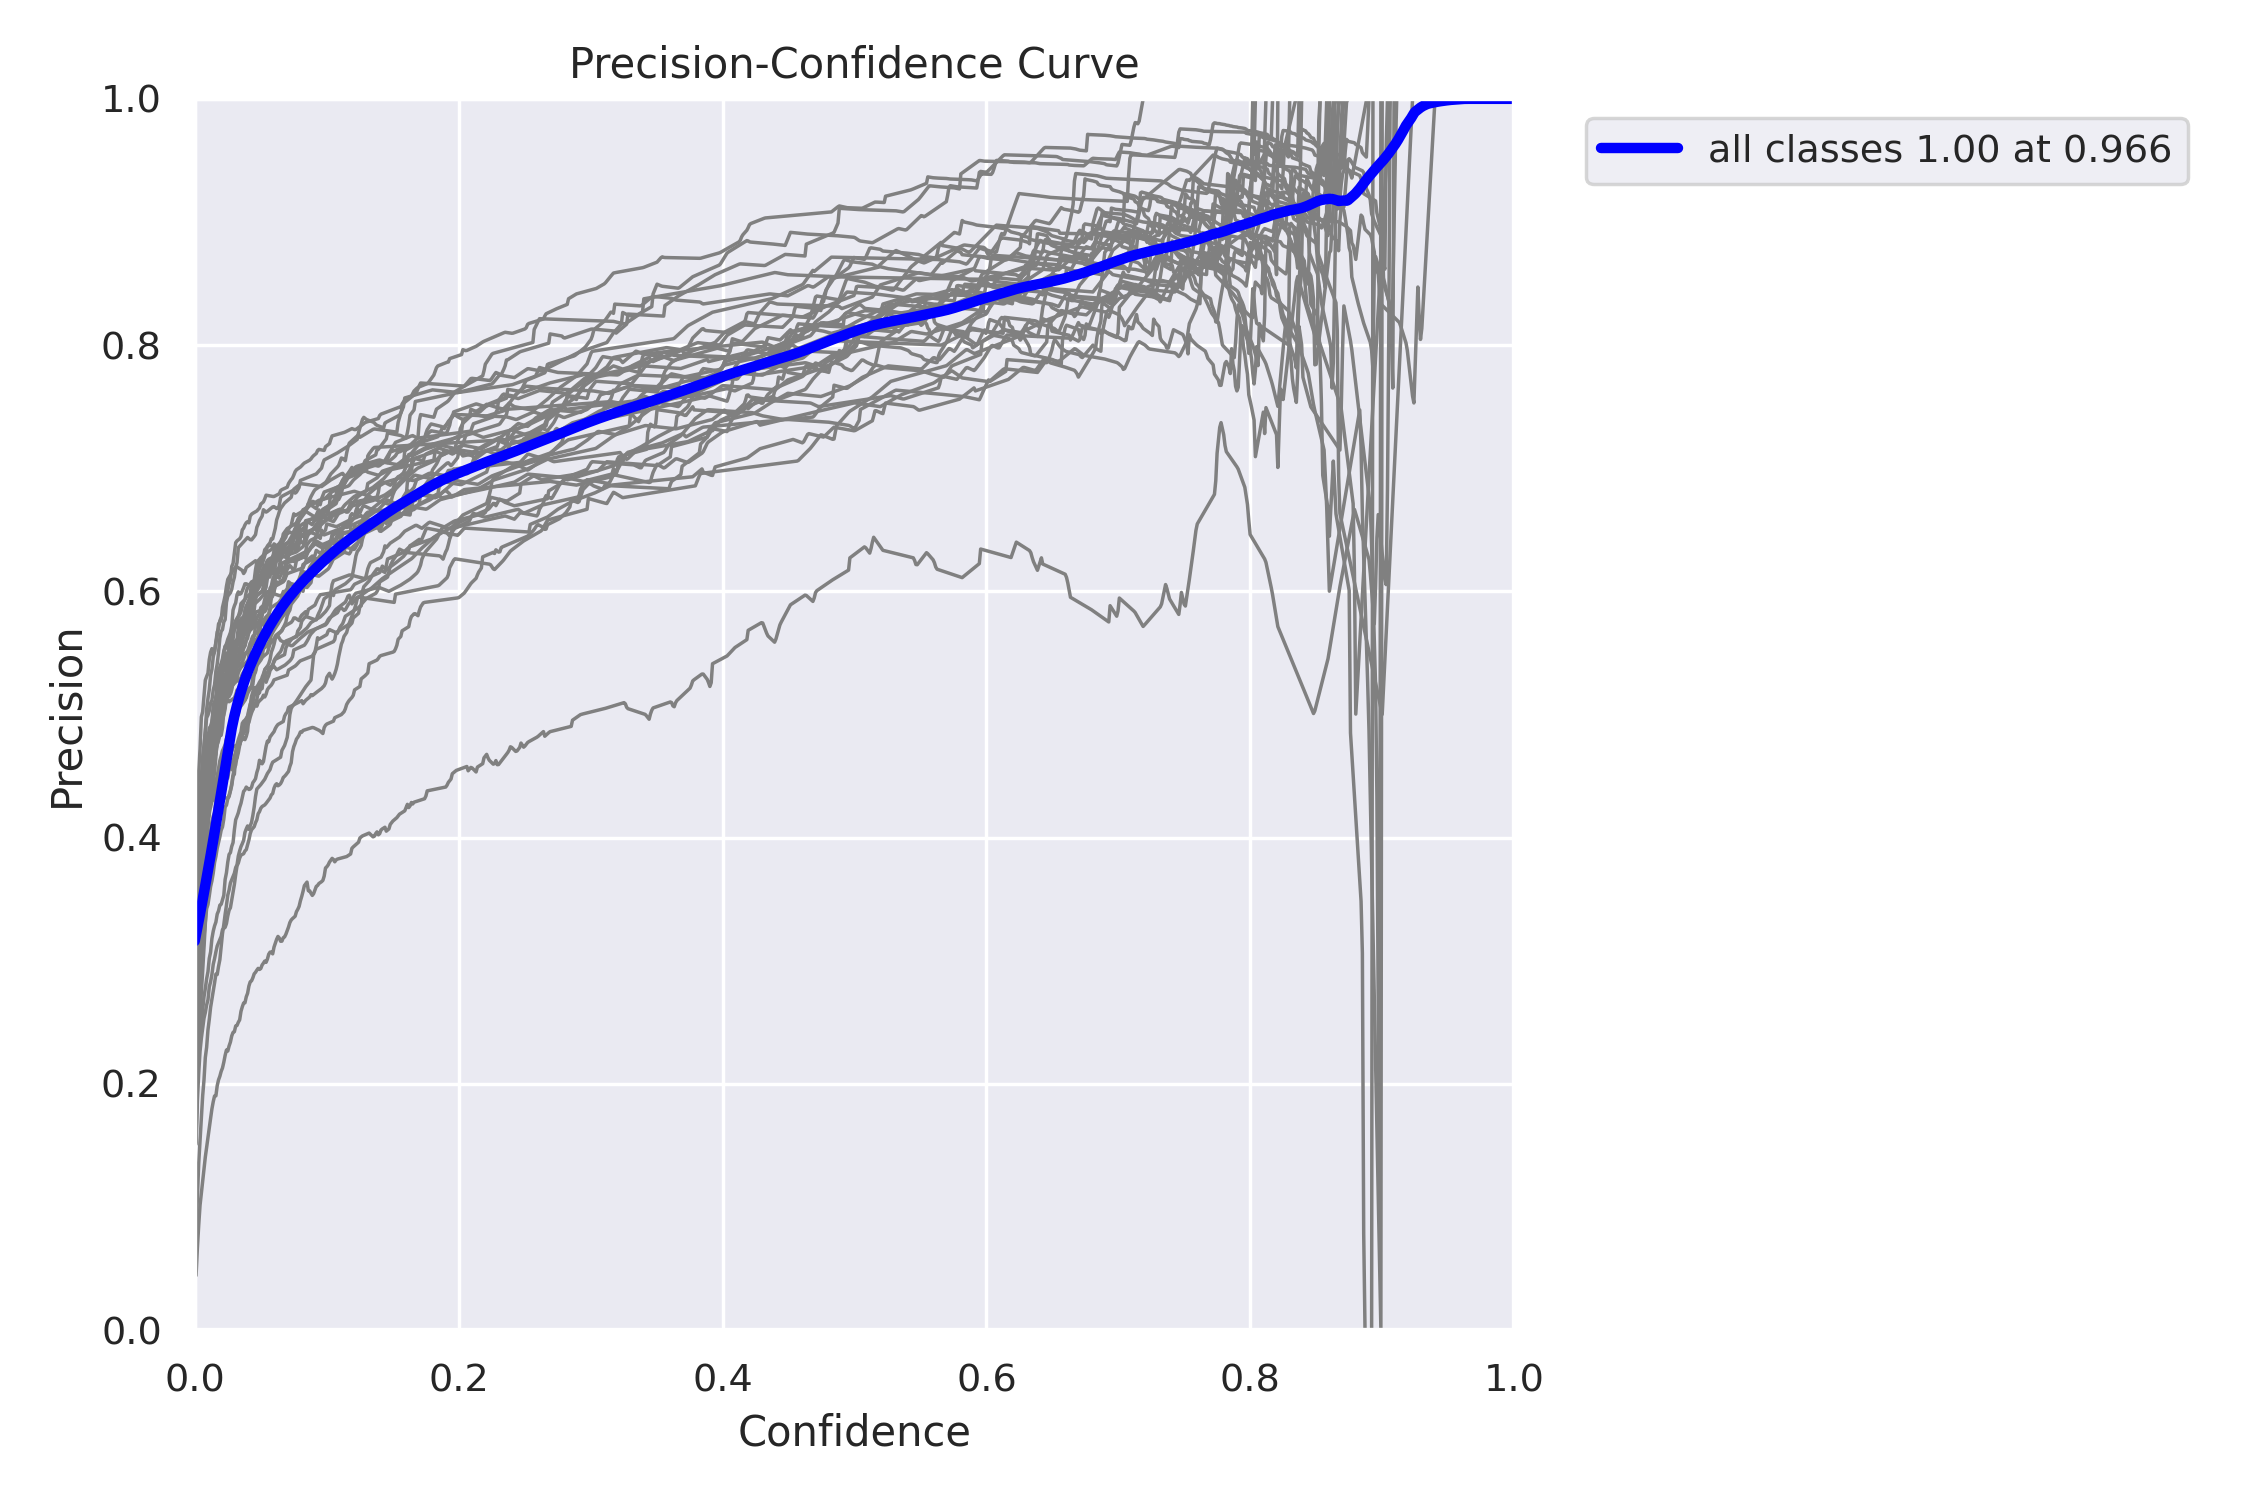

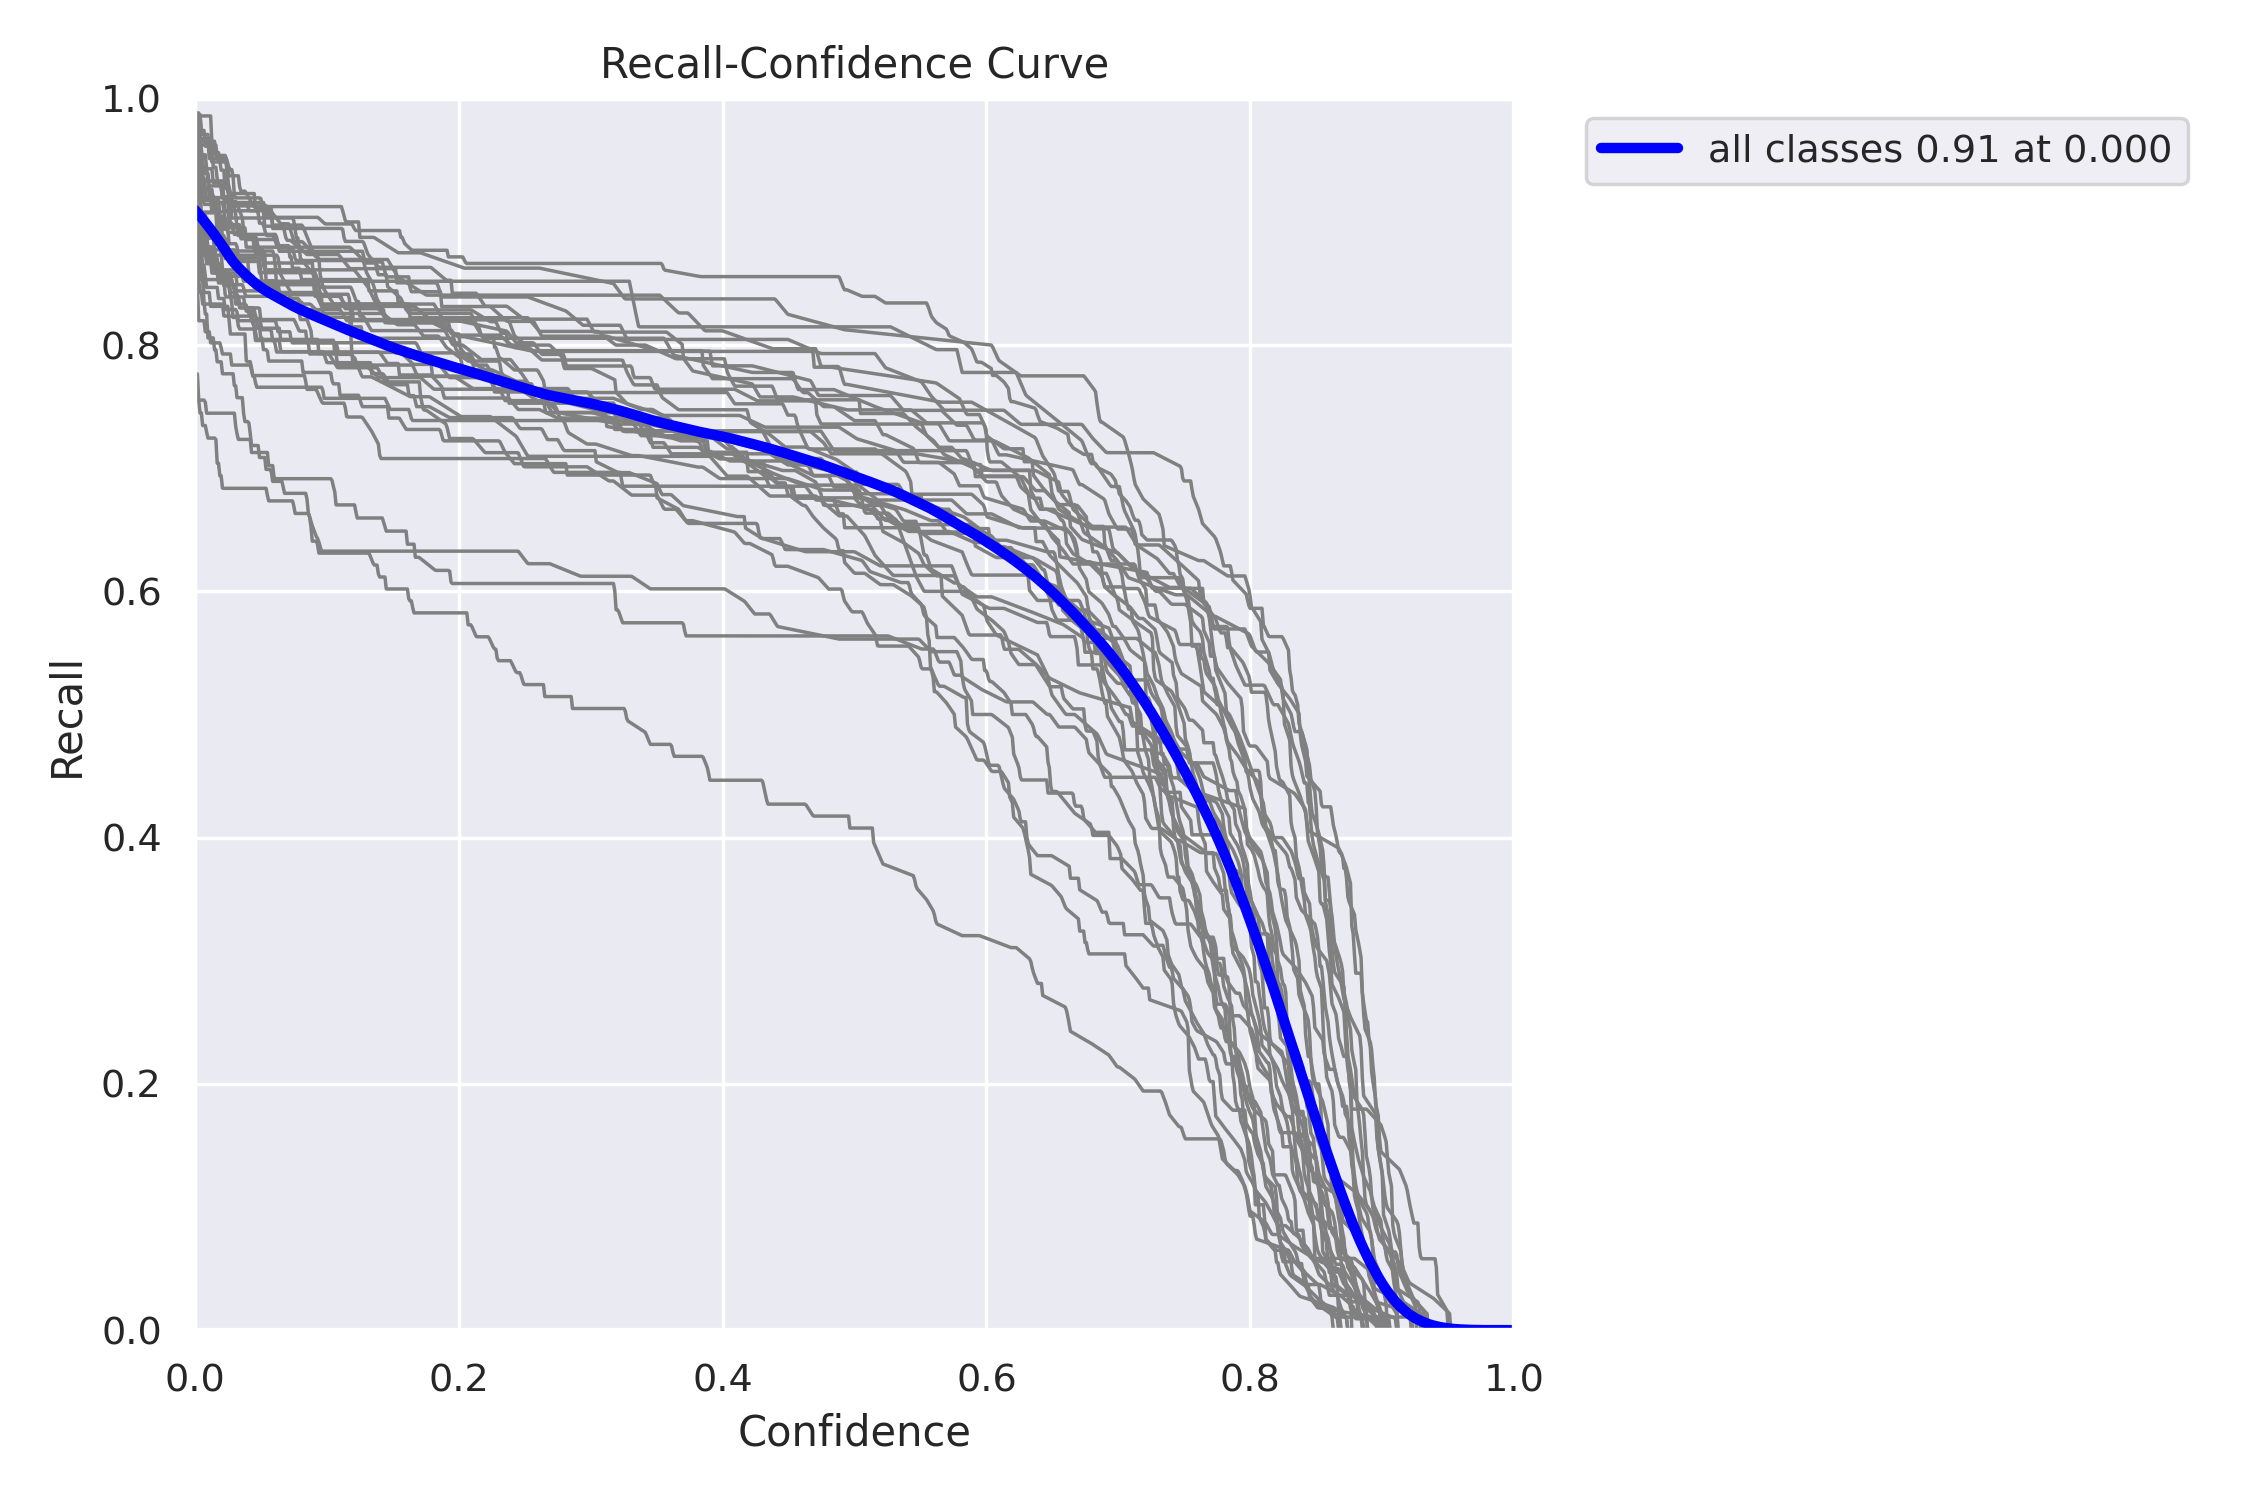

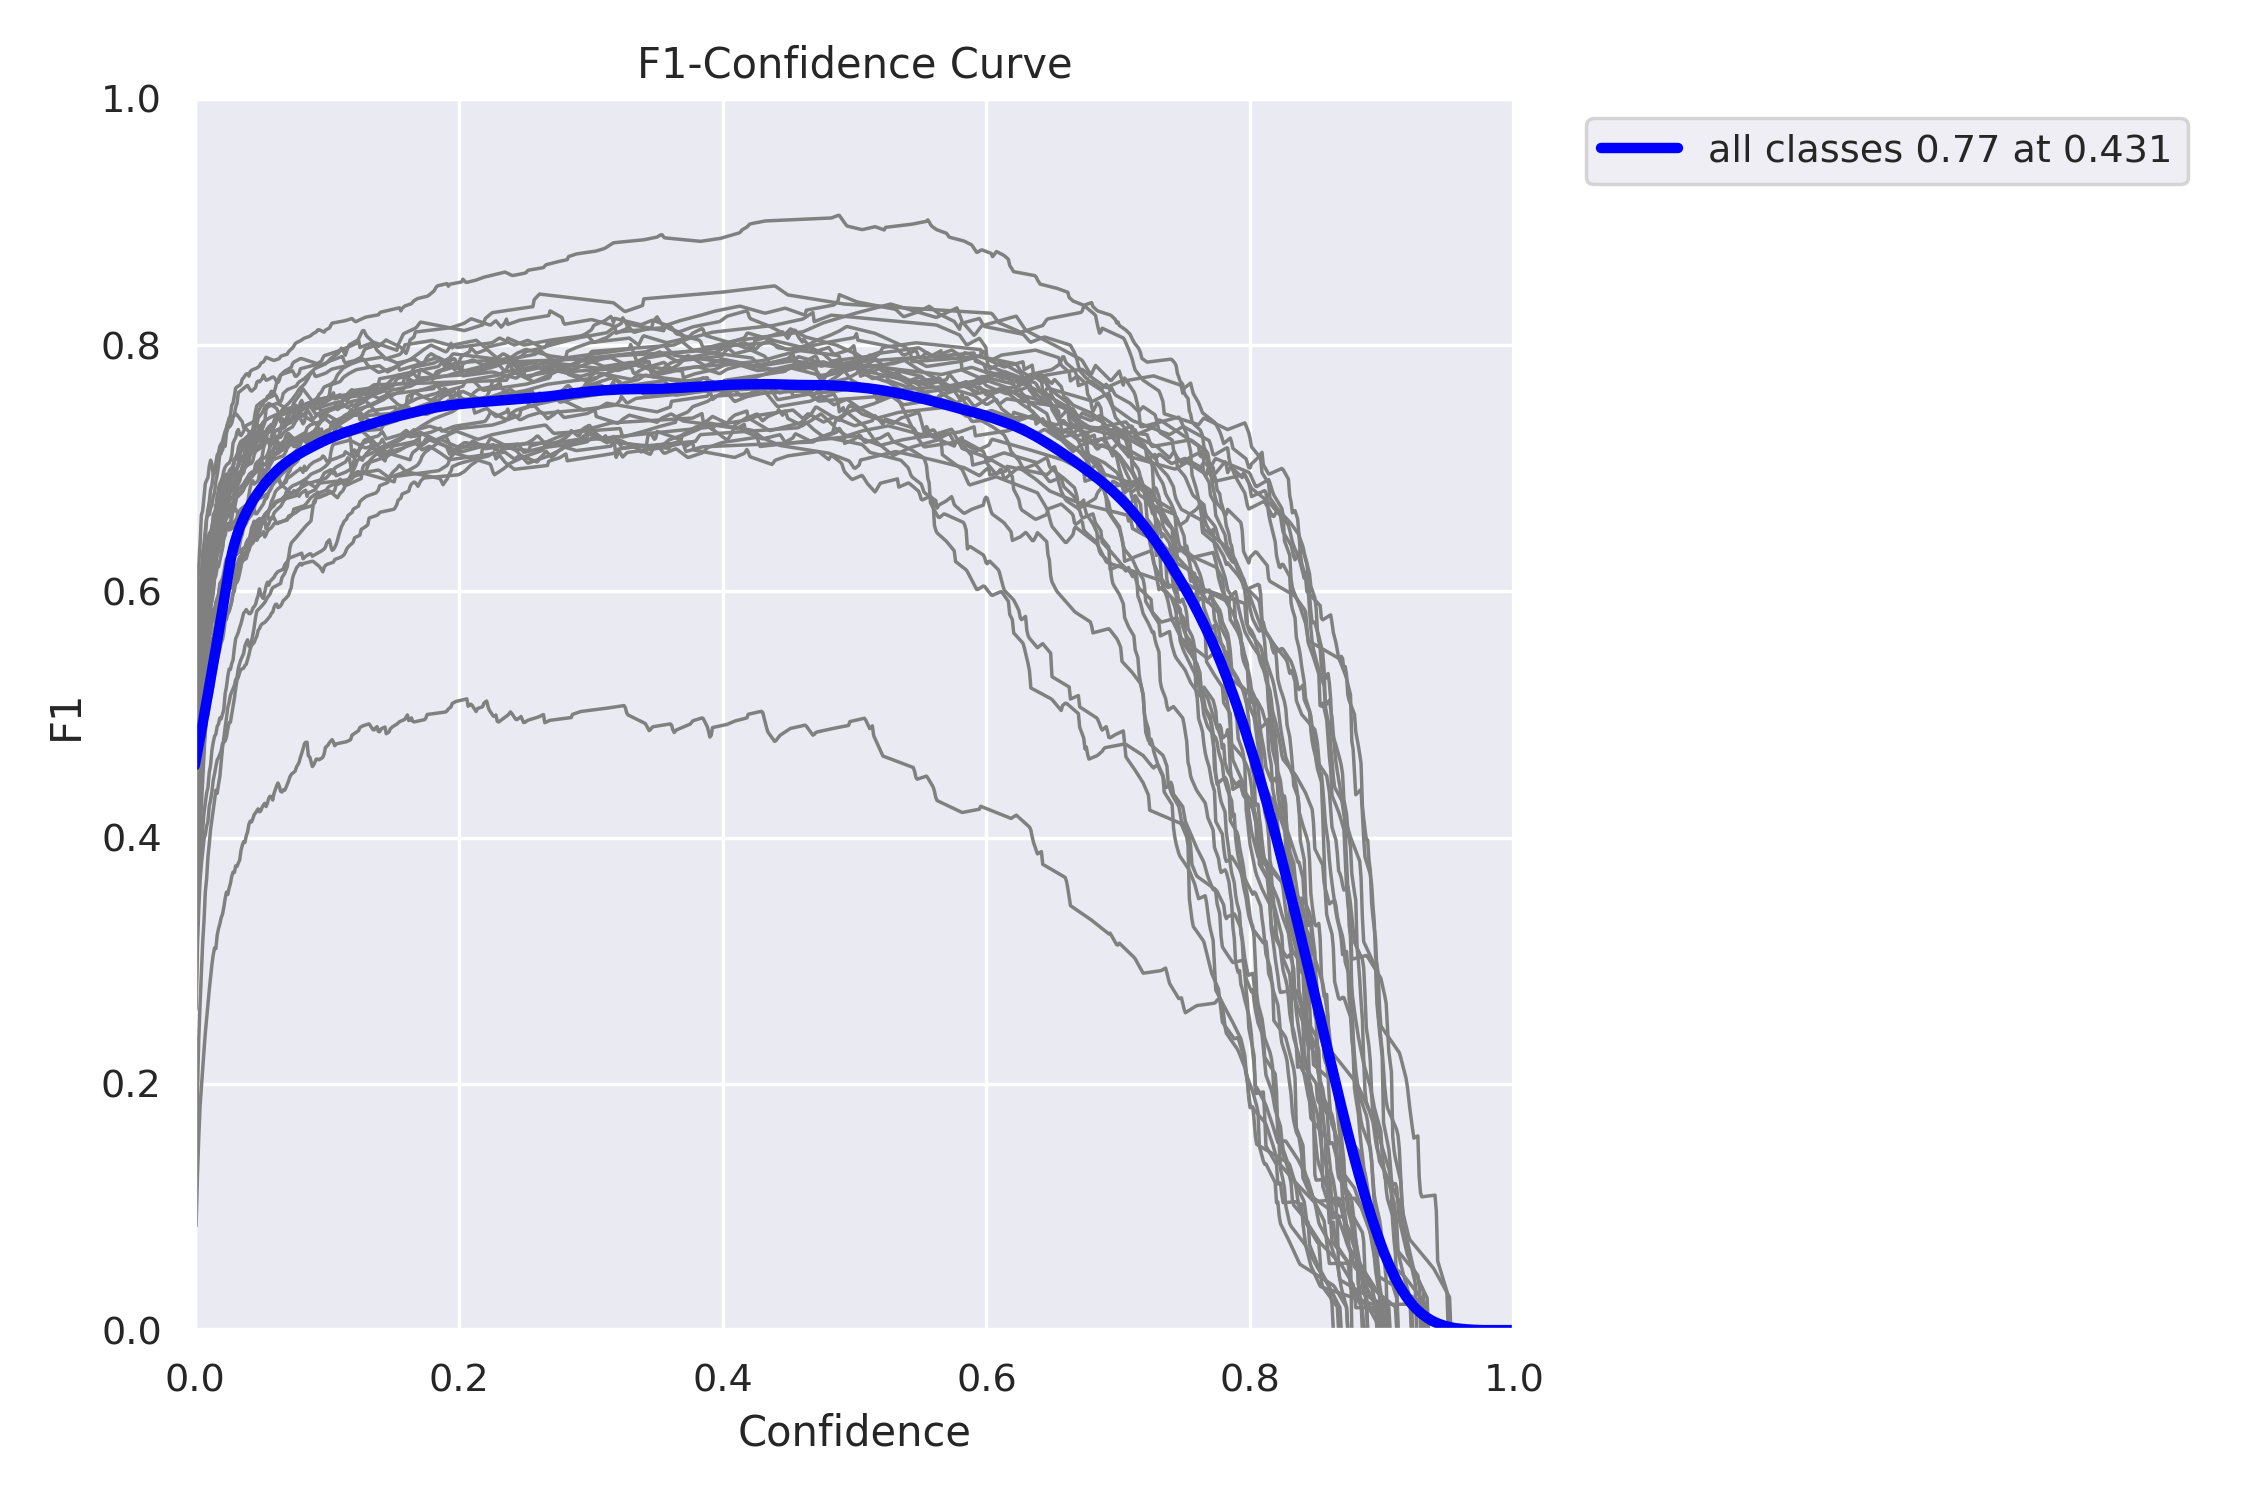

In [9]:
import glob
from IPython.display import Image, display

# Display images
for image_path in glob.glob(f'{HOME}/runs/segment/train/*curve.png'):
    display(Image(filename=image_path, height=600))
    print("\n")

## Data Visualization

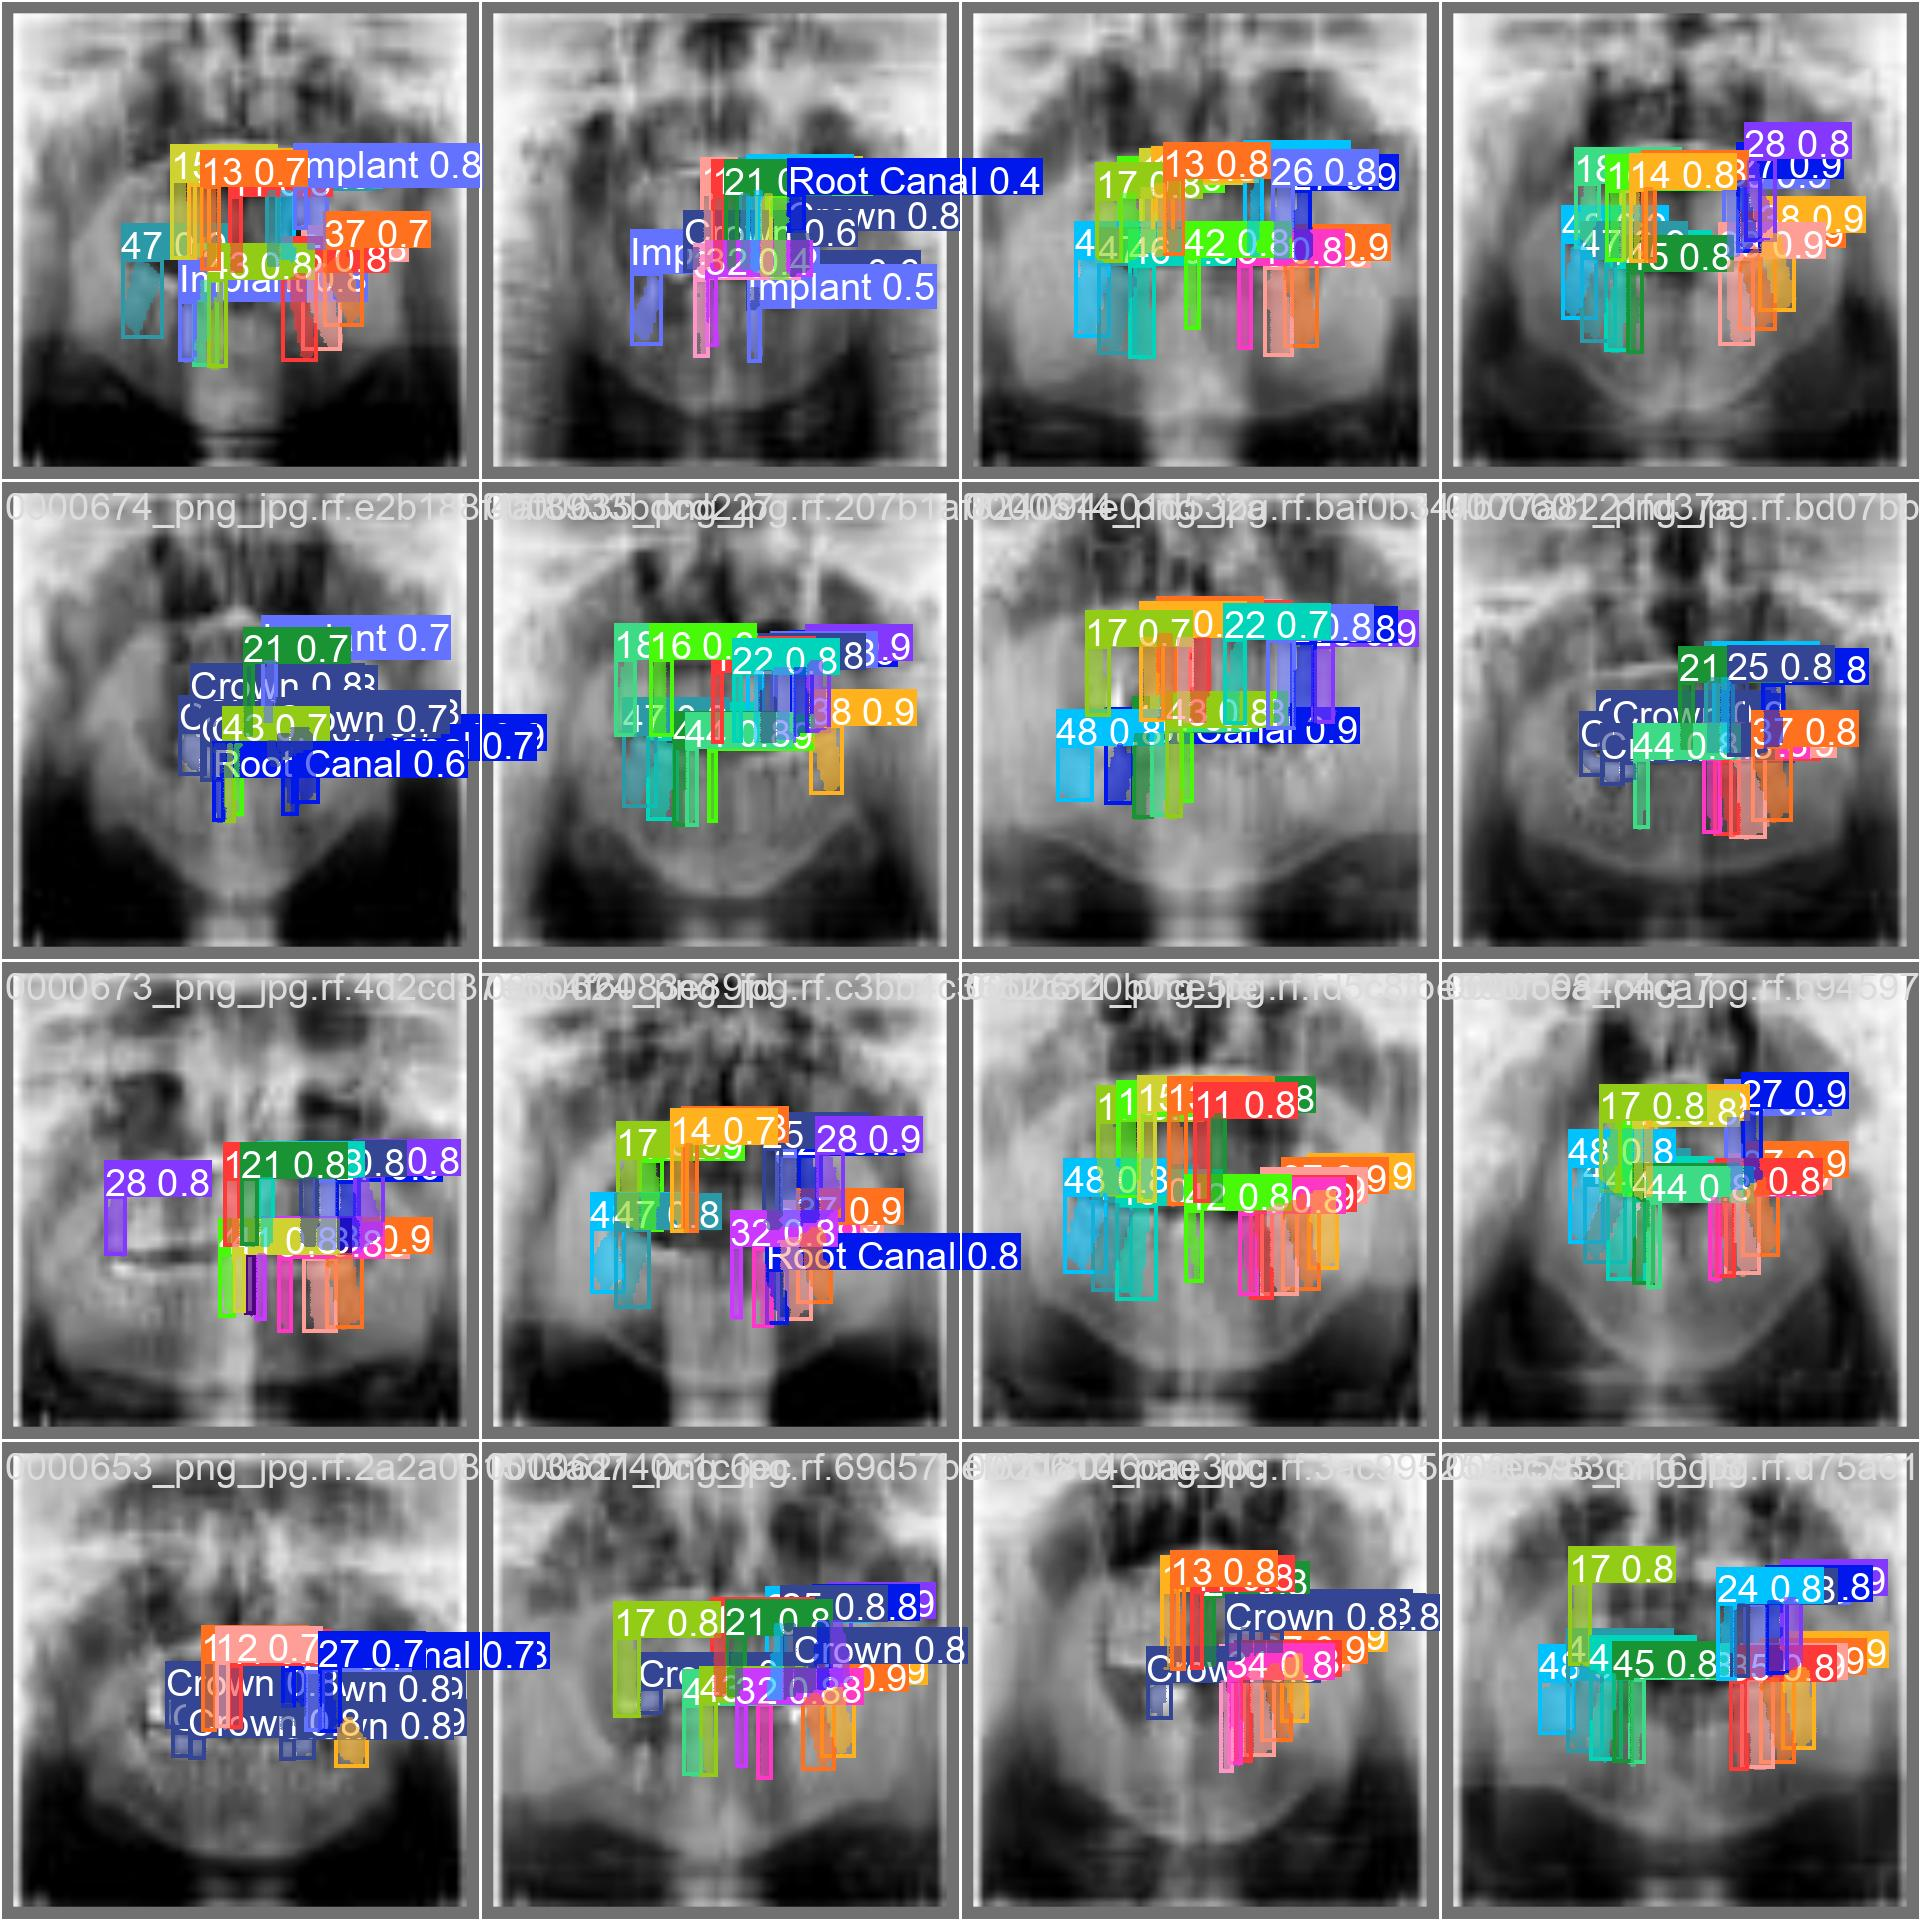

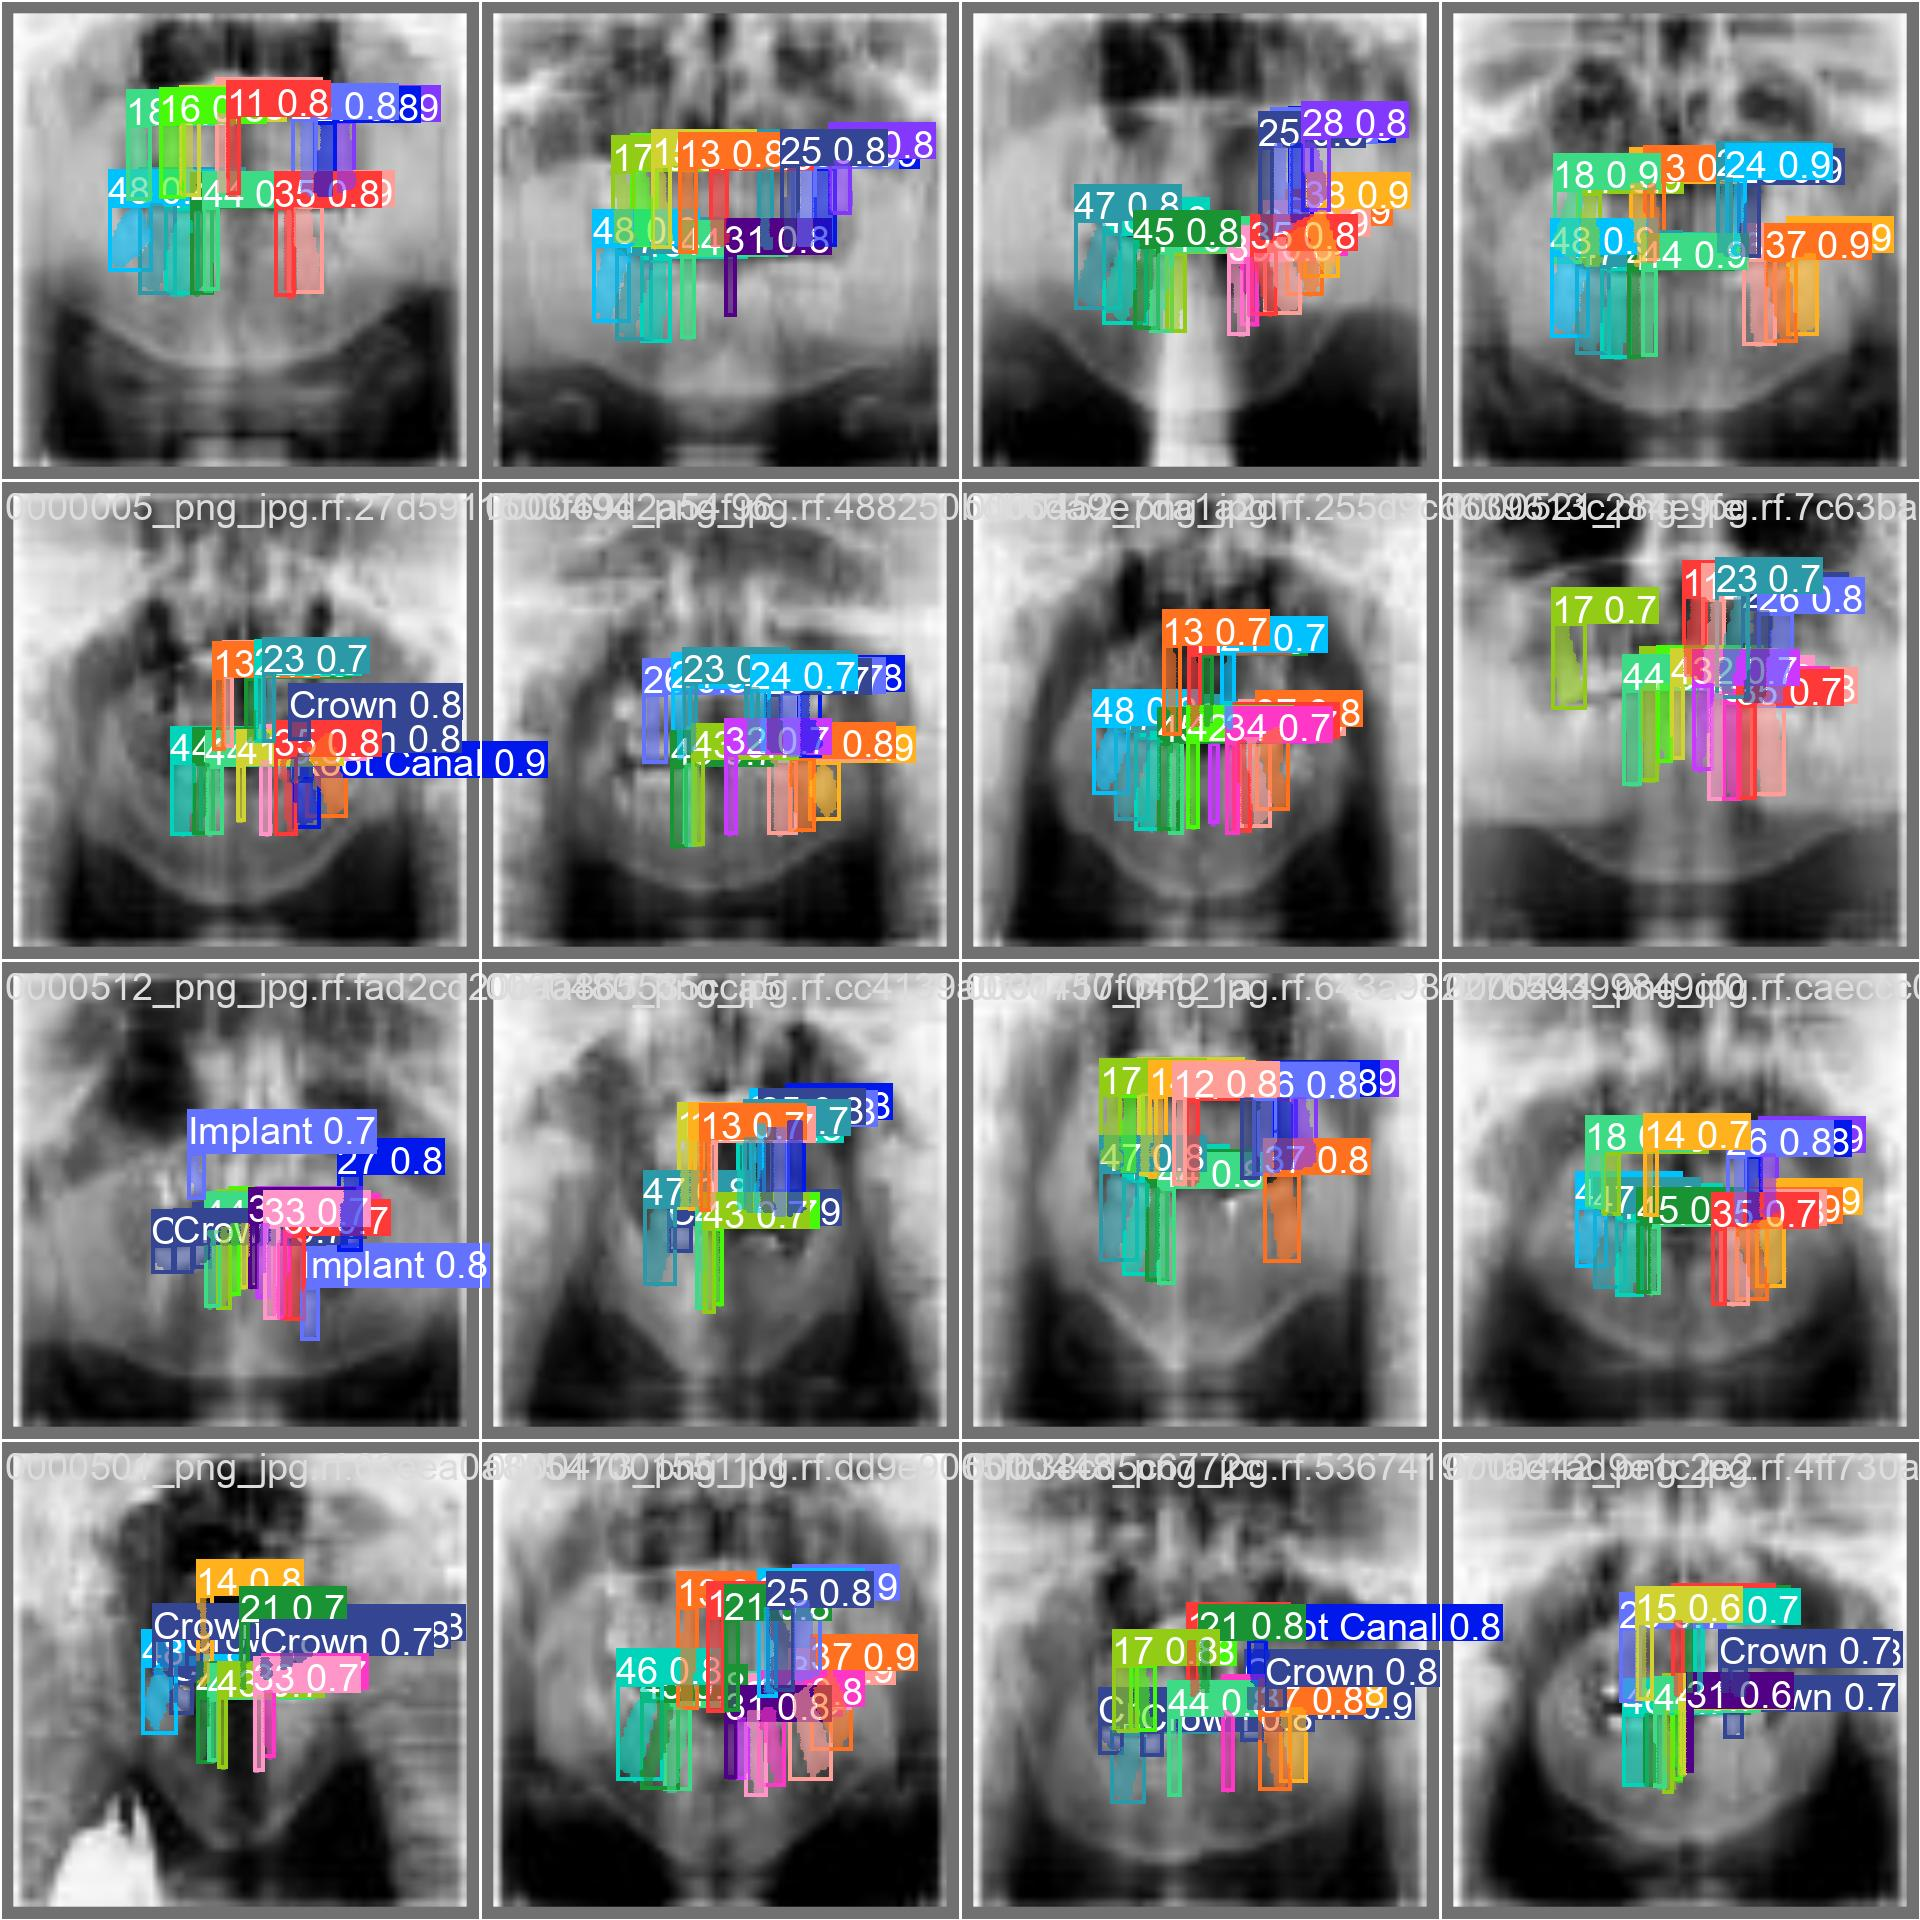

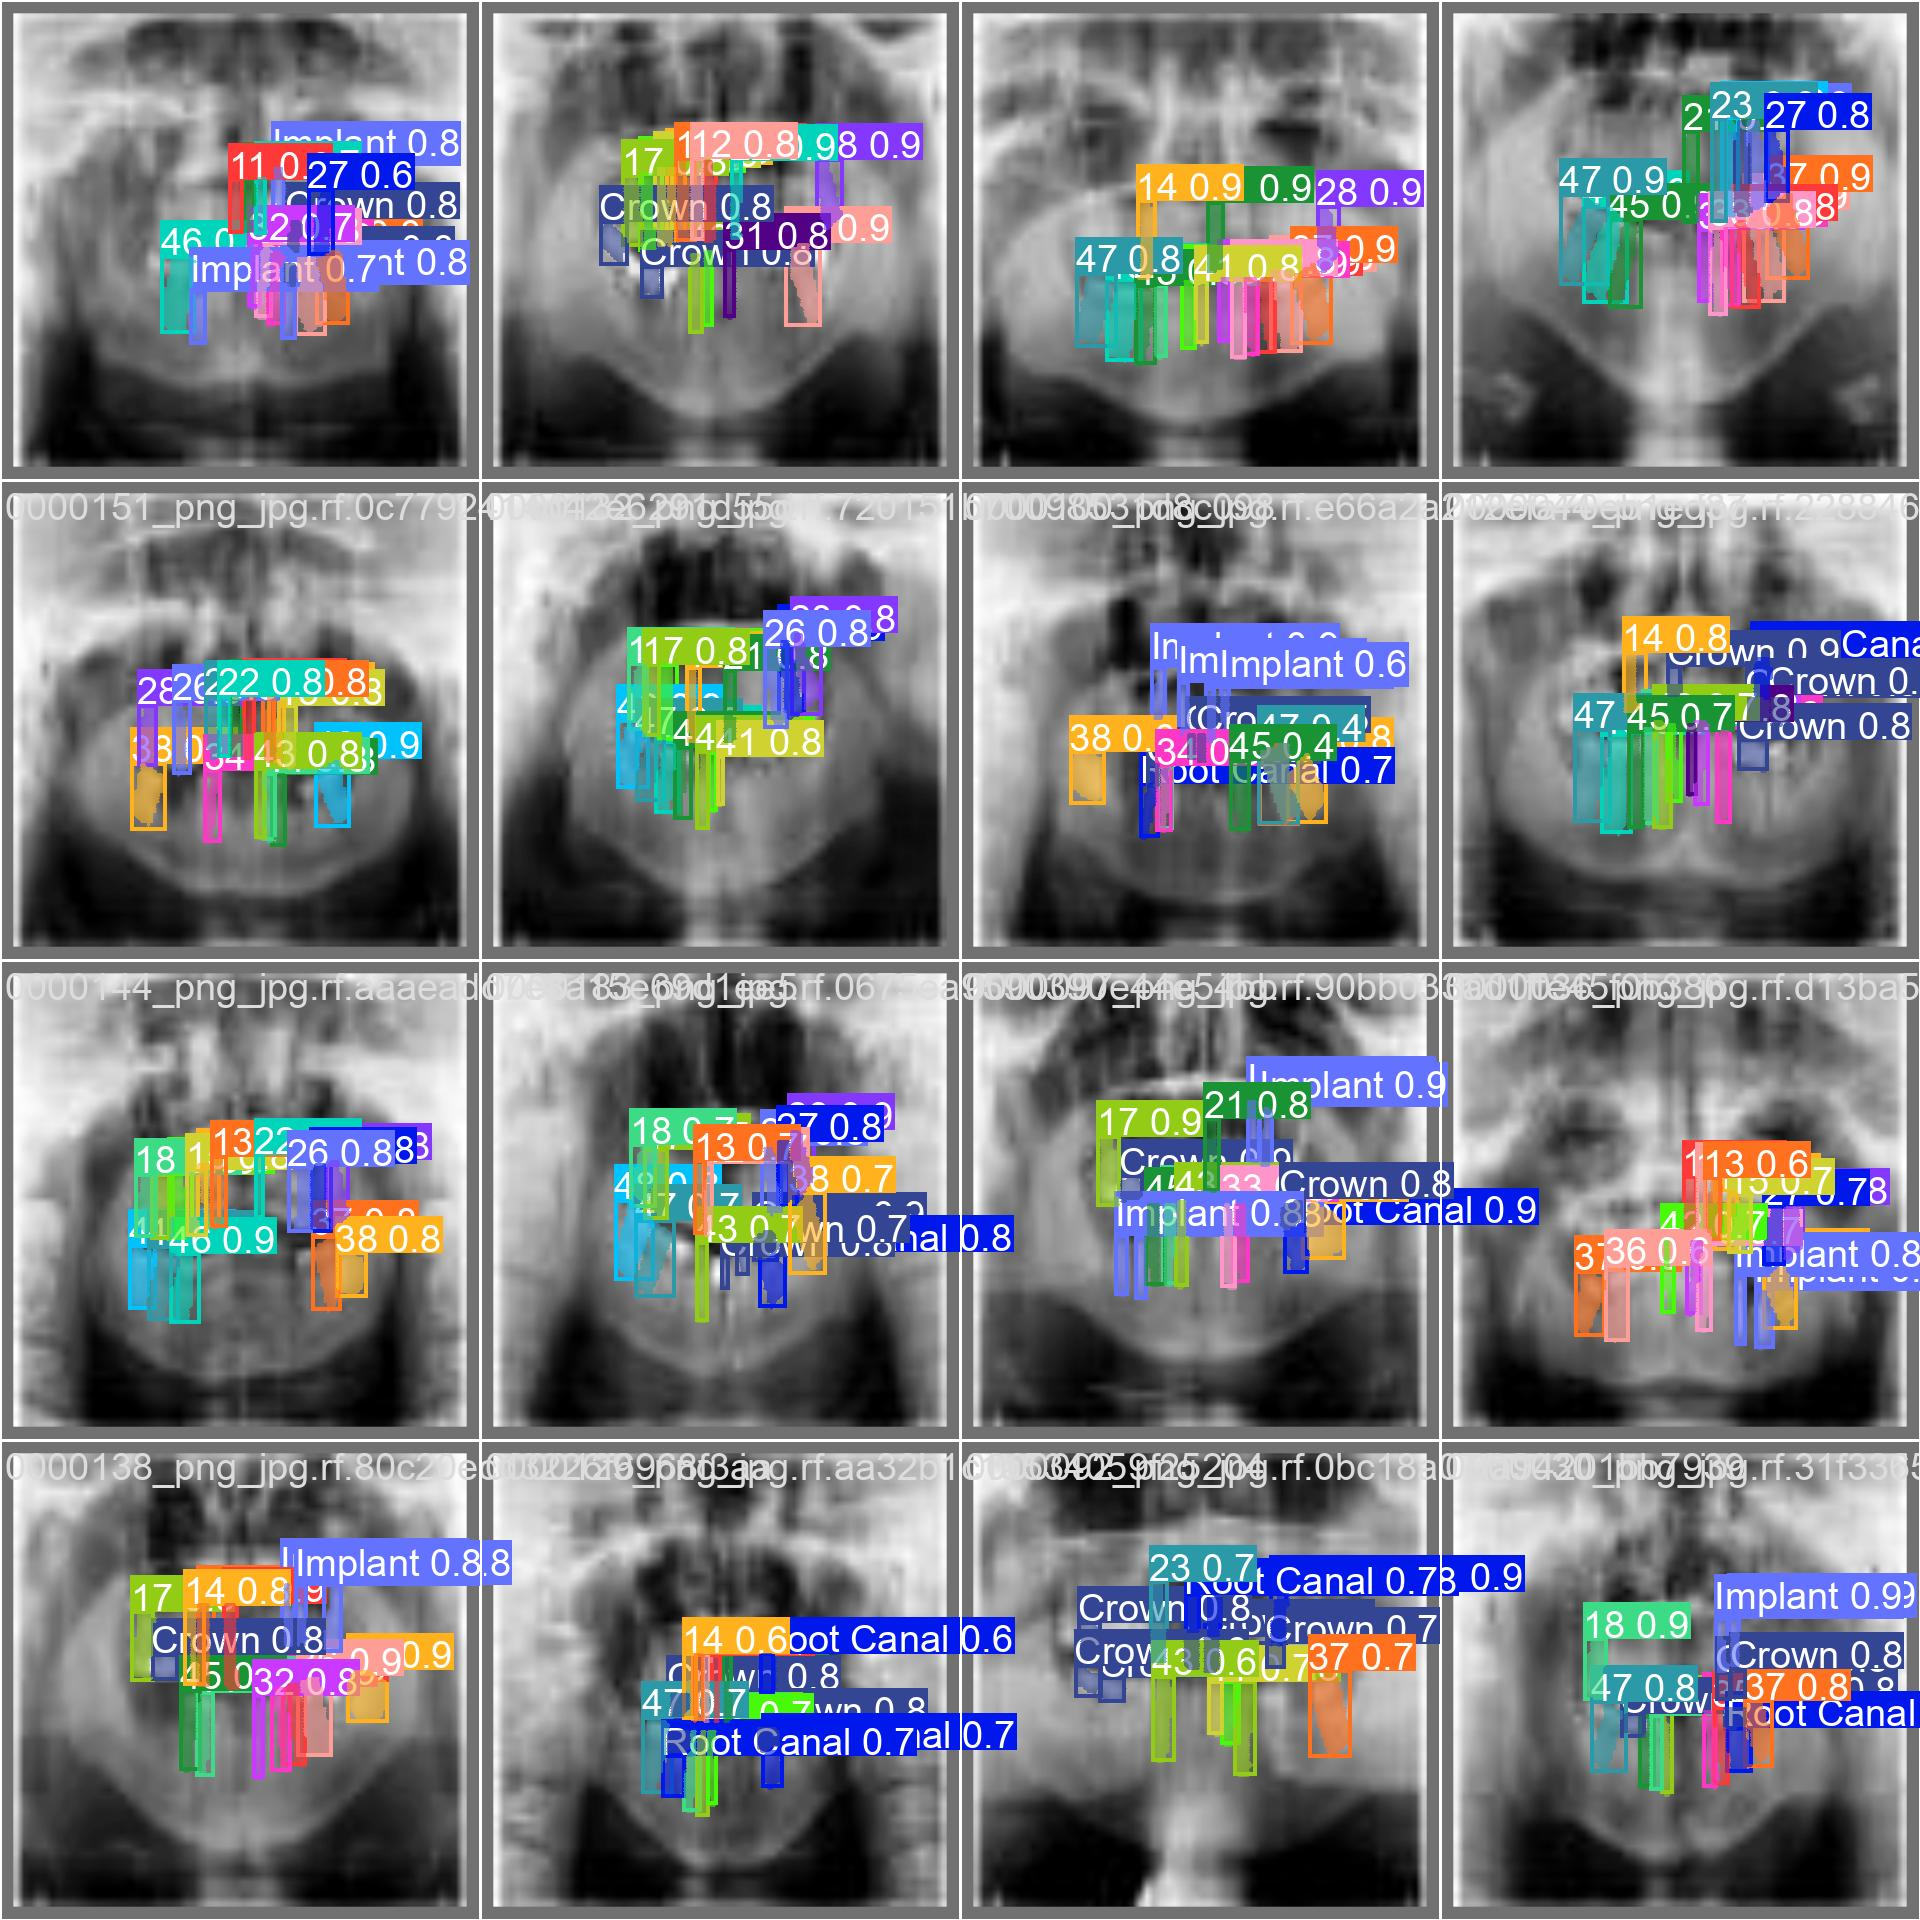

In [10]:
for image_path in glob.glob(f'{HOME}/runs/segment/train/*pred.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")